# 1. ロジスティック回帰

ここでは、目的変数が1，0の二値の場合に、目的変数を説明変数で記述する
ロジスティック回帰の解説とデータ分析の方法を解説します。






## 1.1 統計モデリング

観測データを解析する統計モデリングにおいてまず考えるべき点は、現象がどのような確率分布で記述できるかかという点です。

多種多様な確率分布の中から分析対象のデータの記述・モデル化に使える分布を適切に選ぶ必要があります。

そのとき、データで最初に見るべきは

1. 説明したい量は離散か連続か？

2. 説明したい量の範囲は？正負の値をとるのか、0以上なのか、など。

3. 説明したい量の標本分散と標本平均の関係

などです。

例えば、説明したい量が離散的な場合、正規分布などの連続型確率分布で記述するのは不適当な場合があります。値のレンジが十分大きければ、連続型分布でモデル化することもありますが、そうでないなら離散型分布を考えます。また、目的変数の値が0以上や、あるレンジに限られている場合、そうした制約を再現できる確率分布が望ましいです。最後に、統計的な性質で確率分布が決まることもあります。０以上の整数値をとる場合で、かつデータの平均値を分散が等しい場合、ポアソン分布が使われることが多いです。一方、分散が平均値よりも大きい場合、ポアソン分布で記述するのには工夫が必要です。例えば、平均値が変動するなどを別の確率分布でモデル化すれば、平均値に比べて大きな分散をモデル化できるでしょう。


統計モデリングで用いる確率分布は、こうした分析結果をもとに決める必要があります。

### 1.1.1. 目的変数が連続的なケース

この場合、範囲によって確率分布が異なることもありますが、分布がそれほどいびつでなければ第１候補は正規分布です。

回帰モデルでは目的変数$Y$が連続型確率分布である正規分布に従うとし、
説明変数$\vec{x}$としては連続、離散の場合を考えてきました。

$Y$は$f(\vec{x})$を期待値、分散$\sigma^2$の正規分布に従うとします。
$$
Y\sim N(\mu=f(\vec{x}),\sigma^2)
$$
このとき、$\vec{x}$を指定すると、$Y$の期待値は
$$
E[Y|\vec{x}]=f(\vec{x})
$$
となります。

ここで、$E[Y|A]$において、[]内の縦棒の右に説明変数の値に関する条件を書いています。$E[Y|\vec{x}]$は説明変数が$\vec{x}$のときの$Y$の期待値を意味し、条件付き期待値と呼びます。

また、期待値$f(\vec{x})$は説明変数の線形結合とします。
$$
f(\vec{x})=w_0+\sum_{i=1}^{p}w_i x_i=\vec{w}\cdot \vec{x}
$$

こうした、目的変数$Y$が正規分布に従い、期待値を説明変数の
線形の関数で与える統計モデルを一般線形モデルと呼びます。

#### パラメータの推定とコスト関数

パラメータ$\vec{w}$の推定では最小二乗法を用いました。

目的変数$y$とあてはめ値$f(\vec{x})$の差の平方和$J(\vec{w})$を最小にする
$\vec{w}$を採用します。

$$
J(\vec{w})=n\cdot \mbox{MSE}\equiv
\sum_{i=1}^{n}(y_i-\vec{w}\cdot \vec{x})^2=\sum_{i=1}^{n}(y_i-f(\vec{x}))^2
$$

$$
\vec{w}=\underset{\vec{w}}{最小化}\{J(\vec{w})\}
$$

こうした、最小化する関数をコスト関数と呼びます。

### 1.1.2. ベルヌーイ分布

事象が起きるか起きないか、生命が死ぬか生存する、試験で合格するか、失敗するか、といった二値の事象を確率変数で記述する場合、0で起きない、1で起きるを表すとして0，1の値をとる確率変数$X$を考えます。そして、$X$が1をとる確率を$p$,0となる確率を$1-p$と書くことにします。また、$X=1$を成功、$X=0$を失敗と考え、$p$を成功確率と呼びます。
$$
P(X=x)=\left\{
\begin{array}{cc}
p & x=1 \\
1-p=q & x=0
\end{array}
\right.
$$
この確率分布をベルヌーイ(Bernoulli)分布と呼び、$X$が成功確率pのベルヌーイ分布に
従うことを次のように書きます。
$$
X\sim \mbox{Ber}(p)
$$

$X$の期待値は
$$
\mbox{E}(X)=\sum_{x} xP(X=x)=1\cdot p+0\cdot (1-p)=p
$$
$X$の分散は
$$
\mbox{V}(X)=\mbox{E}(X^2)-\mbox{E}(X)^2=\sum_{x}x^2 P(X=x)-p^2=1^2 \cdot p+0^2\cdot (1-p)-p^2=p(1-p)=pq
$$

---

#### ベルヌーイ分布に従う乱数オブジェクト

scipy.statsにはベルヌーイ分布に従う確率変数のインスタンスを生成する
bernoulli(p)関数があります。

    rv=stats.bernoulli(p)

引数$p$が成功確率を表し、返り値としてBer(p)に
従う確率変数のインスタンス(rv_frozen object)を返します。このインスタンスは
確率関数$f(x)$の計算、乱数の生成など、さまざまなメソッドを持ちます。



|   rv.メソッド名 |                   |
|--------------|-------------------|
|   rv.pmf(x)           |   $P(X=x)$の確率を計算                |
|   rv.rvs(n)     |          $n$個の乱数を生成      |
|   rv.mean()     |          E$(X)$期待値を計算       |
|   rv.var()      |         V$(X$ 分散を計算       |
|-----------------------------------|


#### 確率分布,期待値,分散の計算

例えば、$p=0.6$のインスタンスを生成し、確率分布$P(X=0),P(X=1)$を計算してみます。

In [ ]:
#統計・回帰分析で使うライブラリ
import scipy.stats as stats
# p=0.6のBer(p)のオブジェクトを生成
p=0.6
rv=stats.bernoulli(p)
# P(X=0),P(X=1):確率質量関数(pmf)を計算
rv.pmf(0),rv.pmf(1)

(0.4, 0.6)

$X\sim \mbox{Ber}(p)$のとき、$X$の期待値E$(X)$と分散V$(X)$は$p,p(1-p)$です。

mean()メソッドとvar()メソッドで確認してみましょう。

In [ ]:
# p=0.6のBer(p)のオブジェクトを生成
p=0.6
rv=stats.bernoulli(p)
# E(X)=p,V(X)=p(1-p)を計算して確認
rv.mean(),p,rv.var(),p*(1-p)

(0.6, 0.6, 0.24, 0.24)

期待値、分散はベルヌーイ分布の期待値、分散と一致しました。


$X\sim \mbox{Ber}(p)$の乱数を$n=10$個生成し、サンプルサイズ$n=10$のデータ$\vec{x}$とします。

乱数を実行時に同じにするため、

    np.random.seed(0)

と乱数のシードを0とします。

In [ ]:
#数値計算ライブラリnumpy
import numpy as np
# 乱数のシードを0に設定
np.random.seed(0)
n=10 # サンプルサイズ
# n個の乱数を生成しxに代入
x=rv.rvs(n)
#データを表示し、１個の個数をカウント
print(x,np.sum(x))

[1 0 0 1 1 0 1 0 0 1] 5


10個中5個が1、5個が0となりました。

$p=0.6$のベルヌーイ分布と0,1の相対度数(Relative frequency)を棒グラフでプロットします。

In [ ]:
#x=1の相対度数を計算
rel_freq=np.mean(x)
print(rel_freq)

0.5


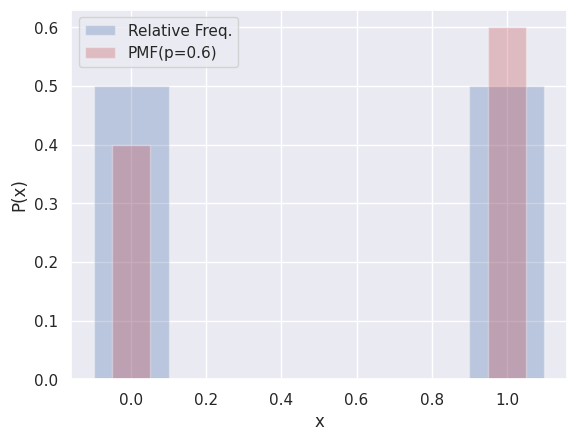

In [ ]:
#可視化ライブラリ
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#y=0,1の相対度数を棒グラフでプロット
xs=[0,1]
plt.bar(xs,[1-rel_freq,rel_freq],width=0.2,alpha=0.3,label="Relative Freq.")
# Ber(0.6)のPMFをプロット
ys=rv.pmf(xs)
plt.bar(xs,ys,color="r",width=0.1,label="PMF(p=0.6)",alpha=0.3)
plt.xlabel("x")
plt.ylabel("P(x)")
plt.legend()
plt.show()

$X\sim \mbox{Ber}(p=0.6)$でしたが、サンプルyでは１の比率は0.5だったので、確率分布と比率（相対度数）は異なります。

---

### 1.1.3. 目的変数が二値の場合


二値の目的変数$y$を統計モデル化する場合、確率$p$を説明変数$\vec{x}$の
関数として記述します。
$$
p=p(\vec{x}).
$$

そして、$y$がベルヌーイ分布に従う確率変数$Y$と考えます。
$$
Y\sim \mbox{Ber}(p(\vec{x}))
$$

$Y\sim \mbox{Ber}(p)$のとき、$E[Y]=p$なので、
$Y$の期待値を$\vec{x}$の関数として記述するわけです。

$$
E[Y|\vec{x}]=p(\vec{x})=\mbox{関数}(\vec{x})
$$

ここで、$E[Y|A]$において、[]内の縦棒の右に説明変数の値に関する条件を書いています。$E[Y|\vec{x}]$は説明変数が$\vec{x}$のときの$Y$の期待値を意味しています。

重回帰モデルなどの一般線形モデル(general linear model)と同じく、
一般化線形モデル(generalized linear model)では、目的変数の期待値を説明変数の関数
として記述します。

このとき、$p$が$[0,1]$の範囲に収まるように、次のシグモイド関数$S(x)$を使う
ことがあります。
$$
S(x)=\frac{1}{1+\exp(-x)}
$$

$S(x)$は$x=0$で$1/2$、確率$p$を
$x\to -\infty$で0,$x\to\infty$で1になります。$[0,1]$の
範囲に収めるのにピッタリです。


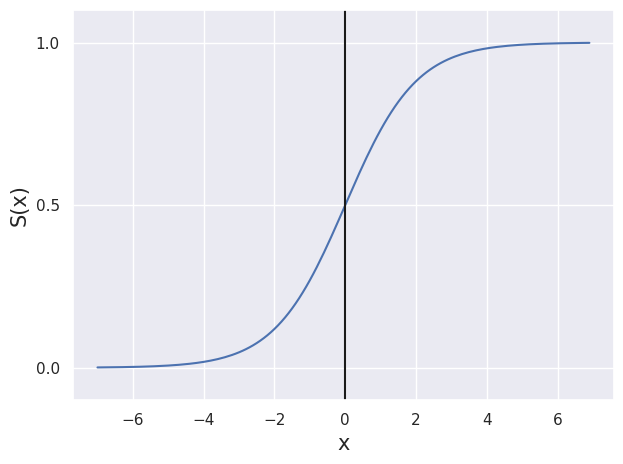

In [ ]:
#@title ーーーーーーーーーーーーシグモイド関数ーーーーーーーーーーーー { vertical-output: true, display-mode: "form" }
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(z):
  return 1.0 / (1.0 + np.exp(-z))

x = np.arange(-7, 7, 0.1)
S_x = sigmoid(x)

plt.plot(x, S_x)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('x',fontsize=15)
plt.ylabel('S(x)',fontsize=15)

plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()


そして、説明変数の関数$f(\vec{x})$を$S(x)$の$x$に代入します。

$$
p(\vec{x})=\frac{1}{1+\exp(-f(\vec{x}))}
$$

シグモイド関数の性質から、$f(\vec{x})=0$のとき、$p=1/2$となります。

オッズは成功確率$p$と失敗確率$1-p$の比$\frac{p}{1-p}$です。
$$
\mbox{オッズ}=\frac{p}{1-p}
$$

計算してみると
$$
\frac{p(\vec{x})}{1-p(\vec{x})}=\exp(f(\vec{x}))
$$
となります。
指数関数の逆関数は対数関数なので、$f(\vec{x})$を
$p(\vec{x})$のオッズの対数で計算できます。
$$
f(\vec{x})=\log \frac{p(\vec{x})}{1-p(\vec{x})}
$$
となります。右辺はオッズの対数なので対数オッズと呼びます。

また、$\log \frac{p}{1-p}$をロジット関数logit$(p)$と呼びます。

$$
\mbox{logit}(p)=\log \frac{p}{1-p}=\mbox{対数オッズ}
$$


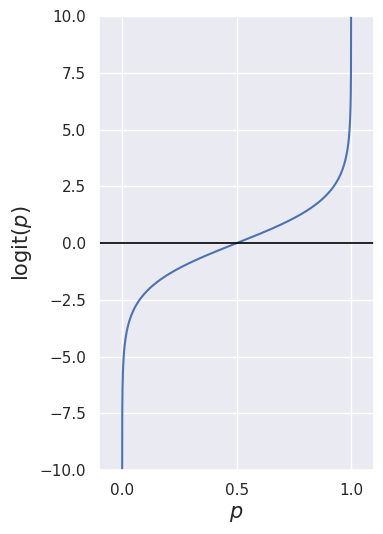

In [ ]:
#@title ーーーーーーーーーlogit関数ーーーーーーー { vertical-output: true, display-mode: "form" }
p = np.arange(1e-5,1.0,1e-5)
plt.figure(figsize=(4,5.5))
plt.plot(p, np.log(p/(1-p)))
plt.xlabel("$p$",fontsize=15)
plt.ylabel("$\mathrm{logit}(p)$",fontsize=15)
plt.xlim(-0.1,1.1)
plt.ylim(-10,10)
plt.hlines(0, -0.1, 1.1, "black",linewidth = 1.2)
plt.xticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.xaxis.grid(True)
plt.tight_layout()
plt.show()

## 1.2 ロジスティック回帰モデル

$p$は$Y$の期待値だったので、
$$
f(\vec{x})=\log \frac{E[Y|\vec{x}]}{1-E[Y|\vec{x}]}=\mbox{logit}(E[Y|\vec{x}])
$$
となります。

特に、$f(\vec{x})$が線形回帰と同様に次のように書けるとき、
$$
f(\vec{x})=\vec{w}\cdot \vec{x}=w_0+\sum_{i=1}^{p}w_i x_i
$$
この確率モデルをロジスティック回帰モデルと呼びます。

$p(\vec{x})$は、
$$
p(\vec{x})=\frac{1}{1+\exp(-f(\vec{x}))}=\frac{1}{1+\exp(-(w_0+w_1 x_1+\cdots +w_p x_p))}
$$
となります。

$\vec{x}$に対して、確率$p(\vec{x})$が大きい場合、$f(\vec{x})$は大きく、
確率$p(\vec{x})$が小さい場合、$f(\vec{x})$は小さくなるように回帰係数
$\vec{w}$を選びます。










### 補足：リンク関数

一般化線形モデルでは目的変数$Y$の期待値を$f(\vec{x})$に結びつける
関数をリンク関数と呼びます。
$$
\mbox{リンク関数}(E(Y|\vec{x}))=f(\vec{x})
$$
また、$f(\vec{x})=w_0+\sum_{i=1}^{p}w_i x_i$のことを線形予測子と呼びます。
$$
\mbox{線形予測子}f(\vec{x})=w_0+\sum_{i=1}^{p}w_i x_1
$$

ロジスティック回帰においては、リンク関数は対数オッズ（ロジット関数）となります。
$$
\mbox{logit}(E(Y|\vec{x}))=f(\vec{x})
$$

通常の線形回帰では、リンク関数は恒等関数です。
$$
\mbox{恒等関数}(E[Y|\vec{x})=f(\vec{x})
$$


## 1.3 最尤法

回帰分析でモデルをデータにフィットするときに誤差平方和を
コスト関数として最小化しました。

$$
\mbox{コスト関数:}J(\vec{w})=n\cdot MSE=\sum_{i=1}^{n}(y_i-f(\vec{x}_{i}))^2
$$

$$
\vec{w}=\underset{\vec{w}}{\mbox{最小化}}\{J(\vec{w})\}
$$

ロジスチック回帰では、$\vec{x}$において
事象が$n$回中$k$回起きたとき、
比率$r=k/n$と確率$p(\vec{x})$の差の平方和が最小になるように
モデルをフィットします。

$$
\vec{w}=\underset{\vec{w}}{最小化}\{(p(\vec{x})-\mbox{比率}r)^2\}
$$

$$
p(\vec{x})=S(f(\vec{x}))=\frac{1}{1+\exp(-w_0-\vec{w}\cdot \vec{x})}
$$

このときのコスト関数$J(\vec{w})$が（ー）対数尤度関数となります。





### 1.3.1 尤度・対数尤度

尤度とは事象の起きる確率のことです。

$n$回の試行$\vec{y}=(y_1,\cdots,y_n),y_{i}\in \{0,1\}$からなる事象$\vec{y}$
では、$n$回の試行で$k=\sum_{i}y_i$回成功、$n-k=\sum_{i}(1-y_i)$回失敗する確率は$p^k(1-p)^{n-k}$です。
$$
P(\vec{y})=p^k(1-p)^{n-k}
$$

尤度は、事象$\vec{y}$の起きる確率$P(\vec{y})$を$p$の関数として書きます。
$$
\mbox{尤度：}L(p|\vec{y})=\mbox{事象の起きる確率}=p^k\cdot (1-p)^{n-k}
$$
$L(p|\vec{y})$のうち、縦棒の左が尤度関数の変数$p$、縦棒の
右が事象$\vec{y}$を表しています。

対数尤度は、尤度の対数です。
$$
\mbox{対数尤度：}l(p|\vec{y})=\log \mbox{尤度}=n\cdot\left( \frac{k}{n}\log p
+\frac{n-k}{n}\log (1-p)\right)
$$

事象が起きた比率$r=k/n$を用いて表すと
$$
\mbox{対数尤度：}l(p|\vec{y})=n\cdot (r\log p+(1-r)\log (1-p))
$$
となります。

対数尤度$l(p|\vec{y})$は$p=r$で最大になり、最大値の
近く$(p\simeq r)$では
$$
l(p|\vec{y})\simeq l(r|\vec{y})-\frac{n}{2 r(1-r)}(p-r)^2
$$
となります（テイラー展開の結果）。

$(p-r)^2$という欲しかった項が現れてくれました。







### 1.3.2. 尤度関数のグラフ

10回の試行$\vec{y}=(y_1,\cdots,y_{10})$において、
結果が次のようになりました。
$$
\vec{y}=1,0,0,1,1,0,1,0,0,1
$$

集計すると10回中5回成功(1)し、5回失敗$(0)$しています。

$$
\mbox{尤度関数：}L(p|\vec{y})=P(\vec{y})=p^{5}\cdot (1-p)^{5}
$$

尤度関数$L(p|\vec{y})$をプロットしてみます。




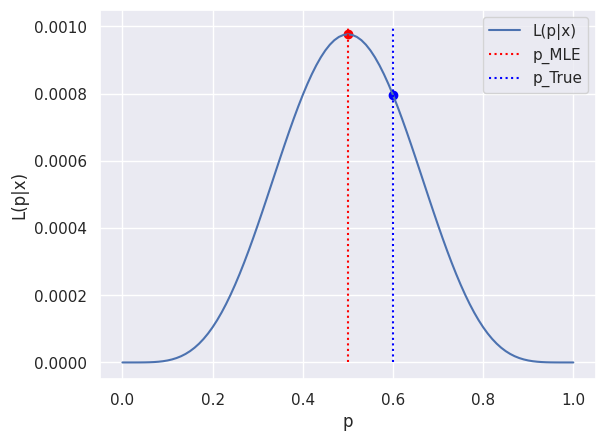

In [ ]:
#@title ーーーーーーーーーーーー尤度関数ーーーーーーーーーーーー { vertical-output: true, display-mode: "form" }
def L(p,x):
  k=np.sum(x)
  n=len(x)
  return p**k*(1-p)**(n-k)

np.random.seed(0)
n=10
x=rv.rvs(n)
ps=np.arange(0,1.001,0.01)
plt.plot(ps,L(ps,x),label="L(p|x)")
plt.vlines(0.5,0, 0.001, color='red', linestyles='dotted',label="p_MLE")
plt.vlines(0.6,0, 0.001, color='blue', linestyles='dotted',label="p_True")
plt.scatter(0.5,L(0.5,x),color="red")
plt.scatter(0.6,L(0.6,x),color="blue")
plt.xlabel("p")
plt.ylabel("L(p|x)")
plt.legend()
plt.show()

### 1.3.3.対数尤度関数のグラフ


$\sum_{i=1}^{n}y_i=5,n=10$のとき、
$$
l(p|\vec{y})=5\log p+5\log(1-p)
$$
となります。$y=1$の相対度数（比率）を$r=k/n=0.5$と書くと
$$
l(p|\vec{y})=n\cdot( r\log p+(1-r)\log (1-p))
$$
となります。


対数尤度関数$l(p|\vec{y})$をプロットしてみます。




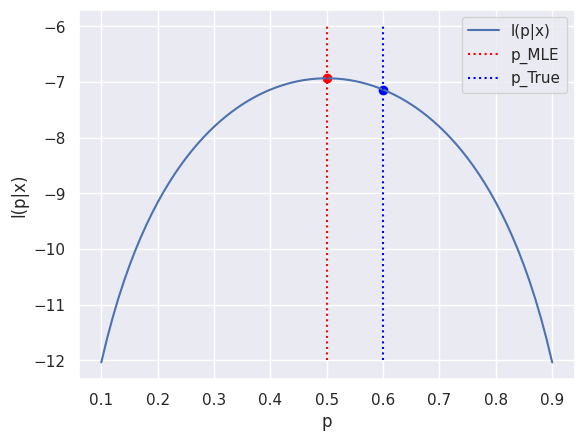

In [ ]:
#@title ーーーーーーーーーーーー対数尤度関数ーーーーーーーーーーーー { vertical-output: true, display-mode: "form" }
def l(p,x):
  k=np.sum(x)
  n=len(x)
  return k*np.log(p)+(n-k)*np.log(1-p)

np.random.seed(0)
n=10
x=rv.rvs(n)
ps=np.arange(0.1,0.91,0.01)
plt.plot(ps,l(ps,x),label="l(p|x)")
plt.vlines(0.5,-12, -6, color='red', linestyles='dotted',label="p_MLE")
plt.vlines(0.6,-12, -6, color='blue', linestyles='dotted',label="p_True")
plt.scatter(0.5,l(0.5,x),color="red")
plt.scatter(0.6,l(0.6,x),color="blue")
plt.xlabel("p")
plt.ylabel("l(p|x)")
plt.legend()
plt.show()

### 1.3.4. 最尤法

ロジスティック回帰では、パラメータ$w_0,\vec{w}$は尤度、対数尤度が
最大の値として推定します。

これが最尤推定(Most Likelihood estimate)です。

$n$回中$k$回、比率$r$で起きた事象$\vec{y}$に対して、$p$を最尤推定
したとき、最尤推定値を$p_{MLE}$と書きます。

$$
p_{MLE}=\mbox{最大化}\{L(p|\vec{y})\}=\mbox{最大化}\{l(p|\vec{y})\}
$$

$$
l(p|\vec{y})\simeq l(r|\vec{y})-\frac{n}{2 r(1-r)}(p-r)^2
$$
だったので、
$$
p_{MLE}=r
$$
となります。

最大化したときの対数尤度の値を最大化対数尤度と呼びます。
$$
\mbox{最大化対数尤度：}l(p_{MLE}|\vec{y})
$$
$p_{MLE}$は$r$に等しいので、最大化対数尤度は
$$
l(r|\vec{y})
$$
となります。



### 1.3.5. 対数尤度と適合度

尤度$L(p|\vec{y})$や対数尤度
$l(p|\vec{y})$の$\vec{y}$依存性はサンプルサイズ$n$と1の比率$r$でした。そこで、
$$
l(p|\vec{y})=l(p|r)
$$

と短縮して書くことにします。

対数尤度関数は$p=r$の近くで2次関数のグラフになっています。

$p\simeq r$として計算すると、$n$が十分大きいとき、
$$
l(p|r)\simeq l(r|r) -\frac{n}{2r(1-r)}(p-r)^2
$$
となります。

最尤法では対数尤度$l(p|r)はモデル$p$とデータ$r$の適合度を表しています。

そして、適合度が最大になるパラメータ$p=r$として$p$の推定を行います。

### 1.3.6. 逸脱度(deviance)

最小二乗法では誤差の平方和のマイナスが決定係数に比例し、モデルとデータの適合度を表していました。
$$
\mbox{決定係数：}R^2=1-\frac{\mbox{誤差の平方和}}{\mbox{目的変数の変動の
平方和}}
$$
適合度を最大にするには誤差の平方和を最小にします。

そこで、誤差の平方和をコスト関数と考えました。


ロジスティック回帰ではデータとモデルの適合度を表すものが対数尤度でした。

コスト関数にあたるのが逸脱度(deviance)です。

逸脱度とは、定数から対数尤度を引いたものを2倍したものです。

$$
\mbox{逸脱度(deviance)D：}2\times (\mbox{定数}-\mbox{対数尤度})
$$

対数尤度を最大化することは逸脱度を最小化することと同値です。

#### 補足

逸脱度の定義での定数は、データに完璧にフィットしたパラメータのモデルでの
対数尤度です。二値の事象では、$i$番目の試行での$Y_i\sim \mbox{Ber}(p_i)$と
試行回数と同じだけのパラメータ$\vec{p}=(p_1,\cdots,p_n)$を用意し、$y_i=1$
のときに確率$p_i$を1、$y_i=0$のときに確率を$p_i=0$とするモデルが完璧にデータ
にフィットするモデルです。この場合、対数尤度はゼロとなりますので定数は考える必要はありません。
$$
\mbox{逸脱度(deviance)D：}-2\times \mbox{対数尤度}
$$

よって、逸脱度は
$$
D=-2 \cdot n \cdot (r\log p+(1-r)\log (1-p))
$$
となります。

$p\simeq r$の場合、
$$
D\simeq -2l(r|r)+\frac{n}{r(1-r)}(p-r)^2
=-2l(r|r)+\frac{n}{p(1-p)}(p-r)^2
$$
となります。

逸脱度$D$はデータDでの1の比率$r$とモデル$p$の適合度を表します。

そして、最尤法は逸脱度を最小化するパラメータ$p=r$で
パラメータを推定すると考えてよいことになります。


$$
p_{MLE}=\mbox{最小化}\{\mbox{逸脱度D}\}
$$



### 1.3.7. 逸脱度のグラフ


$\sum_{i=1}^{n}y_i=5,n=10$のとき、
$$
l(p|\vec{y})=5\log p+5\log(1-p)
$$
でした。逸脱度は
$$
D(p|\vec{y})=-2l(p|\vec{y})
$$
となります。


逸脱度$D(p|\vec{y})$をプロットしてみます。




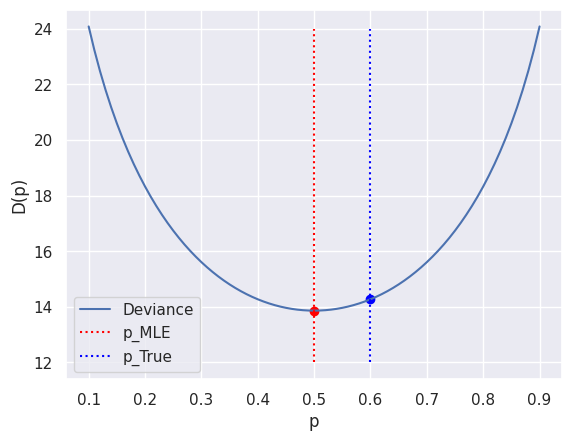

In [ ]:
#@title ーーーーーーーーーーーー逸脱度(Deviance)ーーーーーーーーーーーー { vertical-output: true, display-mode: "form" }
def D(p,x):
  k=np.sum(x)
  n=len(x)
  r=k/n
  l_p=k*np.log(p)+(n-k)*np.log(1-p)
  l_max=0
  return -2*(l_p-l_max)

np.random.seed(0)
n=10
x=rv.rvs(n)
ps=np.arange(0.1,0.91,0.01)
plt.plot(ps,D(ps,x),label="Deviance")
plt.vlines(0.5,12, 24, color='red', linestyles='dotted',label="p_MLE")
plt.vlines(0.6,12, 24, color='blue', linestyles='dotted',label="p_True")
plt.scatter(0.5,D(0.5,x),color="red")
plt.scatter(0.6,D(0.6,x),color="blue")
plt.xlabel("p")
plt.ylabel("D(p)")
plt.legend()
plt.show()

## 1.4 ロジスティック回帰での回帰係数の推定

データセットD$\{(\vec{x}_i,y_i\in \{0,1\})\}_{i=1,\cdot,n}$の場合、尤度は
$$
L(\vec{w}|\mbox{D})=\prod_{i=1}^{n}p(\vec{x}_i)^{y_i}(1-p(\vec{x})^{1-y_i}
$$
ここで、
$p^y(1-p)^{1-y}$は、$y=1$なら$p$、$y=0$なら$1-p$となります。サンプルの
個々の$y_i$の1,0によって
$p(\vec{x}_i)$か$1-p(\vec{x}_i)$を掛けて尤度を計算します。

対数尤度は
$$
l(\vec{w}|\mbox{D})=\sum_{i=1}^{n}(y_i\log p(\vec{x}_i)+(1-y_i)\log (1-p(\vec{x}_i)))
$$
です。

回帰係数$\vec{w}$は対数尤度を最大化するものとして推定（最尤推定）します。

$$
\vec{w}_{MLE}=\underset{\vec{w}}{\mbox{最大化}}\{l(\vec{w})\}
$$

または、対数尤度の符号を反転させたものをコスト関数$J(\vec{w})$として、
コスト関数を最小化するものとして$\vec{w}$を決定します。

$$
\mbox{コスト関数:}J(\vec{w})=-l(\vec{w}|D)
$$

$$
\vec{w}_{MLE}=\underset{\vec{w}}{\mbox{最小化}}\{J(\vec{w})\}
$$


### 1.5.1.  回帰係数の意味:重回帰モデルの場合


$$
E[Y|\vec{x}]=f(\vec{x})=w_0+w_1 x_1+\cdot +w_p x_p
$$

この式は
回帰係数$w_i$は$x_i$のみが1変化し、他の$x_jが変化しないときの$y$が$w_i$変化することを教えてくれます。

$$
\{x_{i}\to x_{i}+1,x_{j}\to x_{j},j\neq i\} \to \Delta y=w_i
$$

### 1.5.2. 回帰係数の意味:ロジスティック回帰モデルの場合

ロジスティック回帰の回帰係数では$w_i$はどのような意味を持つのでしょうか？

オッズとは、事象の起きる確率と起きない確率の比です。
$$
\mbox{オッズ}=\frac{p}{1-p}
$$
$p(\vec{x})=\frac{1}{1+\exp(-f(\vec{x}))}$のオッズは
$$
\mbox{オッズ}=e^{f(\vec{x})}
$$
となります。

また、オッズの対数を対数オッズと呼びます。
$$
\mbox{対数オッズ}=\log \frac{p}{1-p}
$$

$p(\vec{x})=\frac{1}{1+\exp(-f(\vec{x}))}$の対数オッズは
$$
\mbox{対数オッズ}=\log e^{f(\vec{x})}=f(\vec{x})=w_0+\sum_{i=1}^{p}w_i x_i
$$
となります。
この式から、ロジスティック回帰は対数オッズを回帰していることがわかります。

$\vec{x}$において、$x_i$のみ１増やし、他の$x_j(j\neq i)$は変化しないとき、
$f(\vec{x})$は$w_i$変化しました。対数オッズは$w_i$変化します。

すると、オッズは
$$
\frac{p(\vec{x})}{1-p(\vec{x})}=e^{f(\vec{x})}\to \frac{p(\vec{x}^{(i)})}{1-p(\vec{x}^{(i)})}=e^{f(\vec{x}^{(i)})}=e^{f(\vec{x})}\cdot e^{w_i}
$$
と$e^{w_i}$倍に変化します。これがロジスティック回帰における回帰係数
$w_i$の意味です。
オッズは事象の起きる確率と
起きない確率の比だったので、事象のおきやすさの目安です。
そのオッズが$x_i$が１変化すると$e^{w_i}$倍に変化するわけです。$w_i$が正なら
確率が増加し、負なら減少します。



## 1.6 ロジスティック回帰の分類・識別への応用

ロジスティック回帰においては事象が起きるかどうか、成功するか
どうかという確率$p$をシグモイド関数を用いて
予測子$f(\vec{x})$で説明するものです。

$$
S(f(\vec{x}))=P(Y=1|\vec{x})=E[Y|\vec{x}]
$$

この確率$p$の解釈を変更し、データ点$\vec{x}$がクラス1に所属している確率を表すと考えることが出来ます。

たとえば、あるデータ点$\vec{x}$に対して
$$
S(f(\vec{x}))=P(Y=1|\vec{x})=0.8
$$
なら、データ点$\vec{x}$がクラス１に所属する確率が80\%と解釈します。


すると、予測された確率にしきい値関数を適用して二値分類することができます。
$$
Y=\left\{
\begin{array}{ll}
1 & S(f(\vec{x})) \geq 0.5\\
0 & S(f(\vec{x})) \lt 0.5
\end{array}
\right.　\mathrm{or}\,\,
Y=\left\{
\begin{array}{ll}
1 & z \geq 0.0\\
0 & z \lt 0.0
\end{array}
\right.\qquad\qquad\qquad\qquad\qquad\qquad
$$



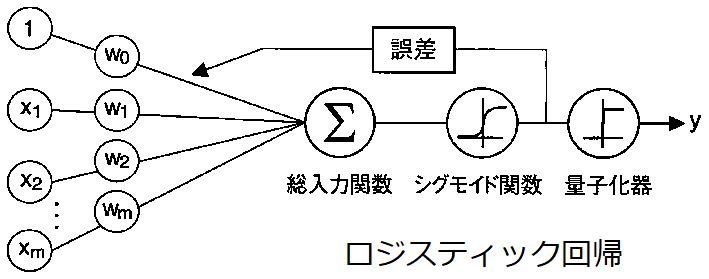


## 1.7 モデルの汎化能力

モデルのフィットにおいて、モデルとデータの適合度を対数尤度で計測し、
対数尤度が最大になる値でパラメータを推定しました。


モデルの汎化能力は、未知データでの予測能力で計測します。
その計測方法のひとつが未知データとモデルの適合度を対数尤度・逸脱度で計測する
ものです。

$$
\mbox{モデルの汎化能力}=\mbox{未知データでの対数尤度}
$$

$$
\mbox{モデルの汎化能力}=\mbox{未知データでの逸脱度}
$$

対数尤度の場合は値が大きいほど、逸脱度の場合は値が小さいほどモデルと未知データとのマッチングはよいことになります。



### 1.7.1 $Y_i\sim \mbox{Ber}(p)$の場合

二値の事象が成功確率$p$のベルヌーイ分布で記述されている（真のモデル）とします。

$n$回の試行中で、$i$回目の試行を$Y_i$で記述しします。
$$
Y_i\sim \mbox{Ber}(p),i=1,\cdots,n
$$

サンプルサイズ$n$のデータ$\vec{y}$で$1$の比率が$r$とします。

すると、$p$の最尤推定値は$r$です。

$$
p_{MLE}=r
$$

最尤推定したモデル$X\sim \mbox{Ber}(p=r)$の汎化能力は
$p$の推定に用いたデータとは別のデータ（未知データ）を用いて計測します。

未知データは真の確率$p$のベルヌーイ分布に従います。
$$
X_{i}\sim \mbox{Ber}(p)
$$

モデルの予測能力の評価には
未知データとモデルの適合度(対数尤度)を用います。

$$
\mbox{モデルの汎化能力}=\mbox{未知データでの対数尤度}
$$

未知データでの1の比率を$r'$、サンプルサイズは$n$とします。
すると、予測能力は$l(p=r|r')$で評価されます。

$$
\mbox{モデルの汎化能力}=l(p=r|r')
$$

### 1.7.2 最大化対数尤度

対数尤度$l(p|r)$は、$p\sim r$のとき
$$
l(p|r)\simeq l(r|r)-\frac{n}{2r(1-r)}(p-r)^2
\simeq l(r|r)-\frac{n}{2p(1-p)}(p-r)^2
$$
でした。

よって、
$$
\mbox{モデルの汎化能力：}l(r|r')\simeq l(r|r)
-\frac{n}{2p(1-p)}(r'-r)^2
$$
となります。

- ここで、$r,r'$は$n$が大きいとき、真の$p$に近いことを使って近似しています。

一方、最大化対数尤度は$l(r|r)$でした。

$$
\mbox{最大化対数尤度：}l(r|r)
$$

モデルの汎化能力は最大化対数尤度$l(r|r)$よりも$\frac{n}{2p(1-p)}(r'-r)^2$だけ
低下します。

$$
\mbox{モデルの汎化能力：}l(r|r')=l(r|r)-\frac{n}{2p(1-p)}(r'-r)^2
$$

つまり、最大化対数尤度$l(r|r)$はモデル$p=r$の汎化能力を過大評価していることになります。


### 1.7.3 未知データに対する対数尤度の不偏推定量

$r,r'\sim \mbox{N}\left(p,\frac{n}{p(1-p)}\right)$を使って$\frac{n}{2p(1-p)}(r'-r)^2$の期待値を計算すると1となります。

つまり、モデルの汎化能力は最大化対数尤度より平均１低いことになります。

$$
E(l(r|r'))=E(l(r|r)]-1
$$

そこで、モデルの汎化能力をモデルのフィットに用いたデータ
のみ($r'$を使わない)で評価する場合、最大化対数尤度から1を引きます。

$$
l(r|r')\mbox{の推定量}=l(r|r)-1
$$


### 1.7.4 赤池情報量基準(A.I.C.)

説明変数が0個の場合で説明しましたが、一般の説明変数が$p$個(=モデルの自由度Degree of Freedomが$p$)のロジスティック回帰モデルの場合、
最大化対数尤度は未知データでの対数尤度より平均$p+1$大きくなります。

$$
E(\mbox{最大化対数尤度})=E(\mbox{未知データでの対数尤度})+(p+1)
$$

モデルの未知データでの対数尤度の不偏推定量は最大化対数尤度-$p+1$となります。

$$
\mbox{未知データでの対数尤度の不偏推定量}=\mbox{最大化対数尤度}-(p+1)
$$

赤池情報量基準(AIC)は、未知データでの逸脱度の不偏推定量です。
逸脱度は対数尤度の(-2)倍だったので、次のようになります。

$$
\mbox{赤池情報量基準AIC}=(-2)(\mbox{最大化対数尤度}-(p+1))
=\mbox{逸脱度}+2(p+1)
$$

モデルのフィットに用いたデータのみに基づいてモデルの汎化能力を
計測する場合、AICを計算します。

また、汎化能力が最大のモデルを選択するには、
AICが最小のモデルを選択すればよいことになります。





### 1.7.5. モデルの性能評価指標:Accuracy


モデルの汎化能力を計測するには、モデルのフィットに用いた訓練データでの
逸脱度を補正したAICを用いる他に、未知データでの予測能力を直接計測することでも可能です。

その際に、用いる指標のひっつががAccuracyです。未知データに対して正確に1,0を予測できたデータの比率です。


$$
\mbox{Accuracy(正解率)}=\frac{\mbox{正しく予測・分類できたデータ数}}{\mbox{データ数}}
$$

AICは尤度が計算可能なパラメトリックなモデルでは利用できますが、
機械学習の多くの手法は尤度が定義されていません。その場合、Accuracy等の
未知データでの予測能力を直接計測して評価します。


## 1.8 参考：さまざまな性能評価指標

ここまでは、モデルの性能を数値化するのに便利な<strong>Accuracy(正解率)</strong>に基づいて性能を評価してきました<br>

この他にも<strong>適合率</strong>、<strong>F1 スコア</strong>などのさまざまな性能指標があります。


### 1.8.1. 混同行列

さまざまな性能指標について説明する前に、<strong>混同行列</strong>について説明します。

以下、PはPositiveのP、NはNegativeのNで、$y=1と$y=0$に対応します。


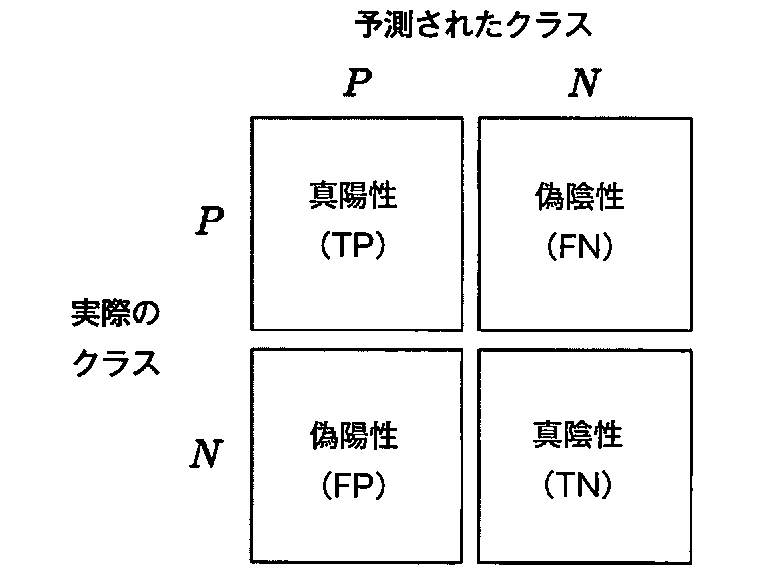



上図のように混同行列は2行2列の正方行列であり、次の4つの予測の個数を報告するものです

1. <strong>真陽性=True Positive </strong>（実際：陽性 &nbsp;, &nbsp;予測：陽性）

2. <strong>偽陰性=False Negative(Type-II Error)</strong>（実際：陽性 &nbsp;, &nbsp;予測：陰性）

3. <strong>偽陽性=False Positive(Type-I Error)</strong>（実際：陰性 &nbsp;, &nbsp;予測：陽性）

4. <strong>真陰性=True Negative</strong>（実際：陰性 &nbsp;, &nbsp;予測：陰性）

AccuracyはTPとTNの比率でした。



### 1.8.2. 分類モデルの適合率と再現率

<strong>誤分類率</strong>（$ERR$）と<strong>正解率</strong>（$ACC$=Accuracy）は次のようになります。


$$
\begin{align}
ERR&=\frac{FP+FN}{FP+FN+TP+TN}\\\\
ACC&=\frac{TP+TN}{FP+FN+TP+TN}=1-ERR
\end{align}
$$

<strong>偽陽性率</strong>（$FPR$）と<strong>真陽性率</strong>（$TPR$）は次のようになります

$$
\begin{align}
FPR&=\frac{FP}{N}=\frac{FP}{FP+TN}\\\\
TPR&=\frac{TP}{P}=\frac{TP}{FN+TP}
\end{align}
$$

これは不均衡な（偏りがある）クラス問題に特に役立つ。

例えばガンのように陽性率が極端に低い場合です。

そこで、ガンの診断では真陽性率(TPR)を上げるのはもちろん、患者の不安を煽らないように偽陽性率(FPR)を下げることも必要である。

<strong>適合率</strong>（$PRE$）と<strong>再現率</strong>（$REC$）は次のようになる


$$
PRE=\frac{TP}{TP+FP}
$$

$$
REC=TPR=\frac{TP}{P}=\frac{TP}{FN+TP}
$$

適合率は陽性と予測したデータ点のうち実際に陽性だったものの割合である。

再現率は真陽性率と同じである.

ガン診断の例だと、陽性という診断をかなり慎重に行えば適合率を最適化できる。

しかし、実際は陽性だったのに陰性と診断された人（$FN$）が多くなり、陽性の不検出が頻繁に起きてしまう

逆に手当り次第に陽性診断をしていれば再現率を最適化でき、陽性の不検出の可能性は最小化される。

しかし、実際は陰性だったのに陽性と診断された人（$FP$）が多くなり、陽性と診断された人に再検査などの負担をかけ、多くの健康な患者に迷惑をかけてしまう。


よって、適合率と再現率の長所と短所のバランスをとらなければならない

適合率と再現率を組み合わせた <strong>F1 スコア</strong>と呼ばれるものがよく使われる（適合率と再現率の調和平均）

$$
F1=\frac{2}{\frac{1}{PRE}+\frac{1}{REC}}
$$


### 1.8.3 ROC曲線とAUC

Accuracyの計算では、確率$p$が0.5以上で$y=1$と予測、$p$が0.5未満で
$y=0$を予測として、実際(actuel)の$y$の値との一致率を調べました。

実際には、この判定に用いたしきい値0.5の値は任意に変更することができます。

慎重に陽性(Positive)と判定したいなら$0.99999$とすれば、
ほぼ$p=1.0$の場合にしか、$y=1$と予測しません。

こうすることで、$FPR$(偽陽性率)を下げることができます。

一方、慎重にすれば、実際には$y=1$なのに、誤って陰性(Negative)と
判定し、真陽性率(TPR)が下がります。つまり、ガンの診断基準を
厳しくすると、ガンだと診断した場合、ほぼガンですが、
ガンなのにガンでないとの診断が増えて、ガン患者のうちでガンだと
診断する率が低下するわけです。

一方、判断基準$p$を下げると、$FPR$（偽陽性率）が大きくなるます。
一方、$y=1$のケースの多くをPositiveと判定することになり、真陽性率(TPR)
が上がります。つまり、ガンの判断基準を甘くすると、ガンだと
診断されても必ずしもガンではない率が増える反面、ガン患者の
多くをガンと正しく診断する率も増えます。

この、判断基準によるFPRとTPRの関係を可視化
したものがROC曲線です。ROC曲線をプロットするときの横軸は偽陽性率（$FPR$）、
縦軸は真陽性率（$TPR$）とします。

ROC 曲線の説明のため、次のような情報を持つ訓練データの例を考えます。


|<td bgcolor=black>|<h3>　**実際のクラス**　</h3>|<h3>**（あるモデルで予測した）<br>陽性クラスに属する確率**</h3>|
|:-:|:-:|:-:|
|<h3>　$0$　</h3><td bgcolor=black>|<h3>$1$</h3>|<h3>$0.8$&nbsp;&nbsp;</h3>|
|<h3>　$1$　</h3><td bgcolor=black>|<h3>$1$</h3>|<h3>$0.45$</h3>           |
|<h3>　$2$　</h3><td bgcolor=black>|<h3>$0$</h3>|<h3>$0.3$&nbsp;&nbsp;</h3>|
|<h3>　$3$　</h3><td bgcolor=black>|<h3>$1$</h3>|<h3>$0.7$&nbsp;&nbsp;</h3>|
|<h3>　$4$　</h3><td bgcolor=black>|<h3>$0$</h3>|<h3>$0.35$</h3>           |
|<h3>　$5$　</h3><td bgcolor=black>|<h3>$0$</h3>|<h3>$0.45$</h3>           |
|<h3>　$6$　</h3><td bgcolor=black>|<h3>$1$</h3>|<h3>$0.65$</h3>           |
|<h3>　$7$　</h3><td bgcolor=black>|<h3>$1$</h3>|<h3>$0.6$&nbsp;&nbsp;</h3>|
|<h3>　$8$　</h3><td bgcolor=black>|<h3>$1$</h3>|<h3>$0.55$</h3>           |
|<h3>　$9$　</h3><td bgcolor=black>|<h3>$0$</h3>|<h3>$0.2$&nbsp;&nbsp;</h3>|


ここで確率のしきい値を $0.8$ として「$0.8$ 未満ならクラス $0$ と予測、$0.8$ 以上ならクラス $1$ と予測する」とします。

そのときの混同行列は次のようになります。



|                         |              |<h3>予測クラス</h3>|                 |
|:-----------------------:|:------------:|:-----------------:|:---------------:|
|                         |              |<h3>$P$</h3>  |<h3>　　$N$　　　</h3>|
|<h3>実際の<br>クラス</h3>|<h3>　$P$</h3>|<h3>　$TP=1$　</h3>|<h3>$FN=5$　</h3>|
|                         |<h3>　$N$</h3>|<h3>$FP=0$</h3>    |<h3>$TN=4$　</h3>|



このとき $FPR=0,　TPR=\frac{1}{6}$ となります。



次にしきい値を $0.45$ として「$0.45$ 未満ならクラス $0$ と予測、$0.45$ 以上ならクラス $1$ と予測する」とします。

そのときの混同行列は次のようになります。

|                         |              |<h3>予測クラス</h3>|                 |
|:-----------------------:|:------------:|:-----------------:|:---------------:|
|                         |              |<h3>$P$</h3>  |<h3>　　$N$　　　</h3>|
|<h3>実際の<br>クラス</h3>|<h3>　$P$</h3>|<h3>　$TP=6$　</h3>|<h3>$FN=0$　</h3>|
|                         |<h3>　$N$</h3>|<h3>$FP=1$</h3>    |<h3>$TN=3$　</h3>|

このとき $FPR=\frac{1}{4},　TPR=1$ となります。

このように、しきい値を変化させると予測結果が変わるため当然 $FPR$ や $TPR$ も変わります


$FPR$ と $TPR$ の変化をわかりやすくするため、予測確率について降順で並び替えています。

|<td bgcolor=black>|<h3>　**実際のクラス**　</h3>|<h3>**（あるモデルで予測した）<br>陽性クラスに属する確率**</h3>|<h3>　$FPR$　</h3>|<h3>　$TPR$　</h3>|
|:-:|:-:|:-:|:-:|:-:|
|<h3>　$0$　</h3><td bgcolor=black>|<h3>$1$</h3>|<h3>$0.8$&nbsp;&nbsp;</h3>|<h3>$0$</h3>|<h3>$0.17$</h3>|
|<h3>　$3$　</h3><td bgcolor=black>|<h3>$1$</h3>|<h3>$0.7$&nbsp;&nbsp;</h3>|<h3>$0$</h3>|<h3>$0.33$</h3>|
|<h3>　$6$　</h3><td bgcolor=black>|<h3>$1$</h3>|<h3>$0.65$</h3>           |<h3>$0$</h3>|<h3>$0.5$</h3>|
|<h3>　$7$　</h3><td bgcolor=black>|<h3>$1$</h3>|<h3>$0.6$&nbsp;&nbsp;</h3>|<h3>$0$</h3>|<h3>$0.67$</h3>|
|<h3>　$8$　</h3><td bgcolor=black>|<h3>$1$</h3>|<h3>$0.55$</h3>           |<h3>$0$</h3>|<h3>$0.83$</h3>|
|<h3>　$1$　</h3><td bgcolor=black>|<h3>$1$</h3>|<h3>$0.45$</h3>           |<h3>$0.25$</h3>|<h3>$1$</h3>|
|<h3>　$5$　</h3><td bgcolor=black>|<h3>$0$</h3>|<h3>$0.45$</h3>           |<h3>$0.25$</h3>|<h3>$1$</h3>|
|<h3>　$4$　</h3><td bgcolor=black>|<h3>$0$</h3>|<h3>$0.35$</h3>           |<h3>$0.5$</h3>|<h3>$1$</h3>|
|<h3>　$2$　</h3><td bgcolor=black>|<h3>$0$</h3>|<h3>$0.3$&nbsp;&nbsp;</h3>|<h3>$0.75$</h3>|<h3>$1$</h3>|
|<h3>　$9$　</h3><td bgcolor=black>|<h3>$0$</h3>|<h3>$0.2$&nbsp;&nbsp;</h3>|<h3>$1$</h3>|<h3>$1$</h3>|


しきい値を下げていくと $FPR$ も $TPR$ も大きくなっていくことがわかります。

（しきい値を下げる → クラス $1$ の判定が甘くなる → ほぼ全てのデータ点がクラス $1$ だと予測される）

横軸を $FPR$、縦軸を $TPR$ として今の結果をプロットしてみます。

各データ点の予測確率をしきい値としたときの $FPR$ と $TPR$ の関係は次のようにまとめられます。

$FPR$ と $TPR$ の変化をわかりやすくするため、予測確率について降順で並び替えています。

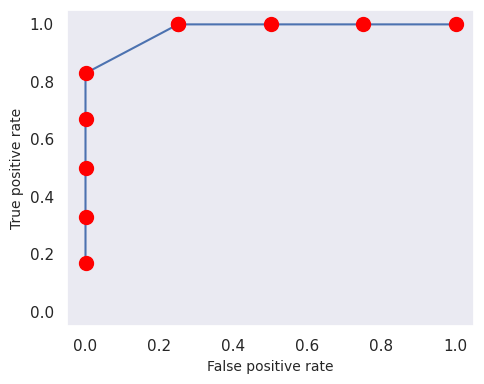

In [ ]:
#@title <h3>ROC 曲線</h3> { vertical-output: true, display-mode: "form" }

fpr = np.array([0, 0, 0, 0, 0, 0.25, 0.25, 0.5, 0.75, 1])
tpr = np.array([0.17, 0.33, 0.5, 0.67, 0.83, 1, 1, 1, 1, 1])

plt.figure(figsize=(5, 4))
plt.scatter(fpr, tpr, color="red", s=100, zorder=2)
plt.plot(fpr, tpr, zorder=1)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.grid()
plt.xlabel('False positive rate', fontsize=10)
plt.ylabel('True positive rate', fontsize=10)
plt.tight_layout()
plt.show()

これが <strong>ROC 曲線</strong>です。しきい値を変化させたときの $FPR$ と $TPR$ による各点を結んだ曲線です。

次に、ROC 曲線を使って分類モデルの性能を明らかにする方法を考えます。

そもそも目指したいのは、「予測した結果 $FPR$ が小さく $TPR$ が大きくなった」という状態です。

しきい値を下げれば $TPR$ は必ず大きくなっていくということも踏まえると、
$FPR$ が小さい初期段階で既に $TPR$ が大きくなっているようなモデルが最適であるとわかります。

つまり、ROC 曲線の下面積が大きければ大きいほど良いモデルだということになります。

この面積を<strong>曲線下面積</strong>（AUC）といいます。

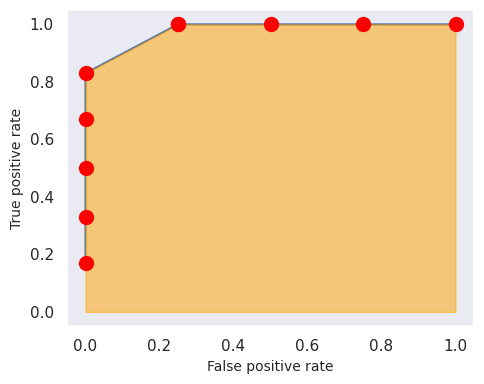

In [ ]:
#@title <h3>AUC</h3> { vertical-output: true, display-mode: "form" }

plt.figure(figsize=(5, 4))
plt.scatter(fpr, tpr, color="red", s=100, zorder=2)
plt.plot(fpr, tpr, zorder=1)
plt.fill_between(fpr, tpr, np.zeros(10), color="orange", alpha=0.5)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.grid()
plt.xlabel('False positive rate', fontsize=10)
plt.ylabel('True positive rate', fontsize=10)
plt.tight_layout()
plt.show()

---

# 2. Pythonでロジスティック回帰分析:statsmodels利用


Pythonでロジスティック回帰を行う場合、重回帰モデルと同じく、統計分析ならstatsmodelsを,機械学習ならscikit-learnを用います。

まず、statsmodelsを用いた分析方法を紹介します。



## 2.1 分析の準備

In [ ]:
#分析に必要なライブラリ、モジュールをimport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import urllib.request
from io import StringIO
#統計・回帰分析で使うライブラリ
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
#scikit-Learnで使うもの
from sklearn.impute import SimpleImputer #欠損値の補間
from sklearn.model_selection import train_test_split #データの分割
from sklearn.preprocessing import MinMaxScaler #正規化
from sklearn.preprocessing import StandardScaler #標準化
from sklearn.linear_model import LinearRegression #重回帰モデル
from sklearn.linear_model import Ridge #リッジ回帰
from sklearn.linear_model import Lasso #ラッソ回帰
from sklearn.preprocessing import PolynomialFeatures #高次項の生成
from sklearn.metrics import r2_score #決定係数の計算
from sklearn.metrics import mean_squared_error #MSEの計算
from sklearn.linear_model import LogisticRegression #ロジスティック回帰モデル
from sklearn.metrics import accuracy_score # Accuracyの計算
from sklearn.metrics import confusion_matrix #混同行列の計算
from sklearn.metrics import precision_score, recall_score, f1_score #分類モデルの評価指標



## 2.2. 説明変数のない場合

一番単純なケースです。0，1のデータ$\vec{y}$から$p$を推定します。

$p=0.6$とし、{Ber}$(p)$に従う乱数を$n=10$個生成し、サンプルサイズ$n=10$のデータ$\vec{y}$とします。

乱数を実行時に同じにするため、

    np.random.seed(0)

と乱数のシードを0とします。

In [ ]:
# p=0.6のBer(p)のオブジェクトを生成
p=0.6
rv=stats.bernoulli(p)
# 乱数のシードを0に設定
np.random.seed(0)
n=10 # サンプルサイズ
y=rv.rvs(n) # n個の乱数を生成しxに代入
#データを表示
print(y,np.sum(y))

[1 0 0 1 1 0 1 0 0 1] 5



説明変数がないので、
$$
f()=w_0
$$
です。$Y=1$の確率$p$は$S(f())$なので、
$$
p=\frac{1}{1+\exp(-w_0)}
$$
となります。$w_0$を推定することになります。

オッズを計算すると
$$
\frac{p}{1-p}=e^{w_0}
$$
なので$w_0$は対数オッズに他なりません。
$$
\log \frac{p}{1-p}=w_0
$$

次のセルのコードを実行します。

In [ ]:
# ベルヌーイ分布でフィット
model = smf.glm("y ~ 1", data=pd.DataFrame({"y":y}),family=sm.families.Binomial()).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                            GLM   Df Residuals:                        9
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6.9315
Date:                Thu, 13 Jul 2023   Deviance:                       13.863
Time:                        04:48:34   Pearson chi2:                     10.0
No. Iterations:                     2   Pseudo R-squ. (CS):          2.220e-16
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.551e-17      0.632   8.78e-17      1.000      -1.240       1.240
==============================================================================
"""

コードの説明です。

[Generalized Linear Models](https://www.statsmodels.org/stable/glm.html)

statsmodelsのglm()関数は一般化線形モデルの推定に用いる関数です。

ロジスティック回帰モデルは一般化線形モデルの一種なので、glm()関数で推定できます。

線形モデルも一般化線形モデルの一種なのでglm()関数で推定できます。


####【引数の書き方】

「formula」:”目的変数 ~ 説明変数１ + 説明変数２ + 説明変数３”形式でロジスティック回帰の目的変数と説明変数の項目名を記述します。

データフレームでの目的変数が$y$で説明変数がない場合、

      y~1

とします。
   
「data」:データの読み込みで定義したデータフレーム名を記述します．

「familiy」:確率分布を記述します.

今回はベルヌーイ分布ですが、ベルヌーイ分布は二項分布で試行回数$n$が1の場合なので、二項分布とします。

    sm.families.Binomial()
    

lm()関数の分析結果の読み方とほぼ同じです。

#### 分析結果の解説

- Dep. Variable: Death # 目的変数は"y"

- Model: GLM # GLM=一般化線形モデル

- Model Family: Binomial # ロジスティック回帰なので試行回数1の二項分布（＝ベルヌーイ分布）です。Bin(1,p)

- Link Function: Logit # リンク関数はロジット関数


- No. Observations: 10 # サンプルサイズ$n$は10

- Df Residuals: 9 # 切片$w_0$の分だけ自由度が減って、残差の自由度(Df Residuals)は9です。

- Df Model:0 # モデルの自由度（=説明変数の個数）は0

- Log-Likelihood: -6.9315 # 対数尤度

- Deviance: 13.863 # 逸脱度

#### 回帰係数の確認

- $w_0$の推定値は5.551e-17ですが、e-17は$10^{-17}$なので0を意味します。

- std errは最尤法（ワルド推定）での標準誤差です。約0.632です。

- P>|z|は最尤法でのワルド検定の結果（p値）です。1なので、$w_0=0$という仮説は棄却されません。


対数尤度はmodelのインスタンス変数llfに格納されています。

In [ ]:
#対数尤度の確認
model.llf

-6.931471805599453

フィットに用いたデータからの逸脱度はインスタンス変数devianceに格納されています。

In [ ]:
# devianceの確認
model.deviance

13.862943611198906

赤池情報量基準(未知データでの逸脱度の推定量)はインスタンス変数aicに格納されています。

In [ ]:
#aicの確認
model.aic

15.862943611198906

回帰係数$\vec{w}$の取得方法


インスタンス変数paramsに格納されています。

In [ ]:
#係数の取得方法
model.params

Intercept    5.551115e-17
dtype: float64

$w_0$を確率$p$に変換するには、シグモイド関数を用いるのでした。

$$
p=S(w_0)=\frac{1}{1+\exp(-w_0)}
$$

In [ ]:
#シグモイド関数を定義
def sigmoid(z):
  return 1.0 / (1.0 + np.exp(-z))
#pの計算
sigmoid(model.params)

Intercept    0.5
dtype: float64

最尤推定値$p_{MLE}$は$r=0.5$と一致しています。

予測値の計算

目的変数が1をとる確率の計算はpredict()メソッドで計算します。

- ()内に未知データ、テストデータをデータフレームに指定して計算します。

- ()が空白の場合、フィットに用いた訓練データでの1の確率を計算します。




In [ ]:
#モデルのy=1の確率の計算
model.predict()

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

目的変数の値を予測する場合、確率をもとに1か0を決めます。0.5以上を1、0.5未満を0
など、確率に対してしきい値を決めて1，0に変換します。



In [ ]:
#モデルの予測の計算
(model.predict()>=0.5).astype(int)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

新たに生成した未知データでAccuracyを計算します。

フィットしたモデルではいつも1と予測します。

未知データの個数と同じ個数の1⃣を並べて予測値y_predとします。

Accuracyは未知データでの1の比率と等しくなります。

In [ ]:
# 乱数のシードを0に設定
np.random.seed(0)
n=10000 # サンプルサイズ
y_new=rv.rvs(n) # n個の乱数を生成しy_newに代入
#予測値1を作成。全成分1の1次元配列。
y_pred=np.ones(len(y_new))
#未知データで予測値と一致した比率とy_newでの１の比率を計算
print(np.mean(y_new==y_pred),np.mean(y_new))

0.6058 0.6058


accuracy_score（）関数を用いて計算してみます。

In [ ]:
from sklearn.metrics import accuracy_score
#データを生成した真のモデルでyの値を予測
print('Accuracy: %.4f' % accuracy_score(y_new,y_pred))

Accuracy: 0.6058


## 2.2 説明変数がある場合

説明変数がある場合を解説します。

2値の目的変数$Y\in \{0,1\}$を2個の説明変数$\vec{x}=(x_1,x_2)$のロジスティック回帰モデルで記述します。

$$
Y \sim \mbox{Ber}(p(\vec{x})),p(\vec{x})=\mbox{Sigmoid}(f(\vec{x}))
$$

$$
S(f(\vec{x}))=\frac{1}{1+\exp(-f(\vec{x}))}
$$

$$
f(\vec{x})=w_0+w_1 x_1+w_2 x_2
$$



#### 決定境界

予測子:$f(\vec{x})$が0となる場合、$p(\vec{x})=0.5$となります。

$Y\in \{0,1\}$の予測で確率0.5を基準に1か0を決める場合、$f(\vec{x})=0$の条件で
決まることになります。

$\vec{x}$が領域$\{\vec{x}\in R^2|f(\vec{x})\ge 0\}$に入れば1、領域$\{\vec{x}\in R^2|f(\vec{x})< 0\}$に入れば0です。

2つの領域の境界を決定境界(Decision boundary)と呼びます。


$f(\vec{x})=0$を解くと、決定境界は
$$
x_2=-\frac{w_0}{w_2}-\frac{w_1}{w_2}x_1
$$
という直線の方程式になります。


#### データの生成

$w_0=-2,w_1=4,w_2=0$として、$n=30$のデータを生成してみます。

$$
f(x_1,x_2)=-2+4\cdot x_1+0\cdot x_2
$$

つまり、2個の説明変数のうち$x_2$は不要です。

$x_1,x_2$は区間$[0,1]$の一様乱数とします。

次のセルを実行すると、データフレームdfが生成されます。

In [ ]:
#乱数のシードを設定
np.random.seed(0)
#回帰係数を設定
w0,w1,w2=-2.0,4.0,0.0
#サンプルサイズ
n=30
#x1,x2を10個の一様乱数で生成
x1=2*(np.random.rand(n)-0.5)
x2=2*(np.random.rand(n)-0.5)
#シグモイド関数を定義
def sigmoid(z):
  return 1.0 / (1.0 + np.exp(-z))
#シグモイド関数で確率を計算
ps=sigmoid(w0+w1*x1+w2*x2)
#一様乱数が確率以下なら1、そうでないなら0と変換
y=(np.random.rand(n)<=ps).astype(int)
#データフレームにまとめる
df=pd.DataFrame({"x1":x1,"x2":x2,"y":y})
df.head()

,x1,x2,y
0,0.097627,-0.470889,1
1,0.430379,0.548467,1
2,0.205527,-0.087699,0
3,0.089766,0.136868,1
4,-0.152690,-0.962420,0


$w_0=-2,w_1=4,w_2=0$より、決定境界は$-2+4x_1=0$を解いて、

$$
x_1=0.5
$$
となります。

データの散布図と決定境界をプロットしてみます。

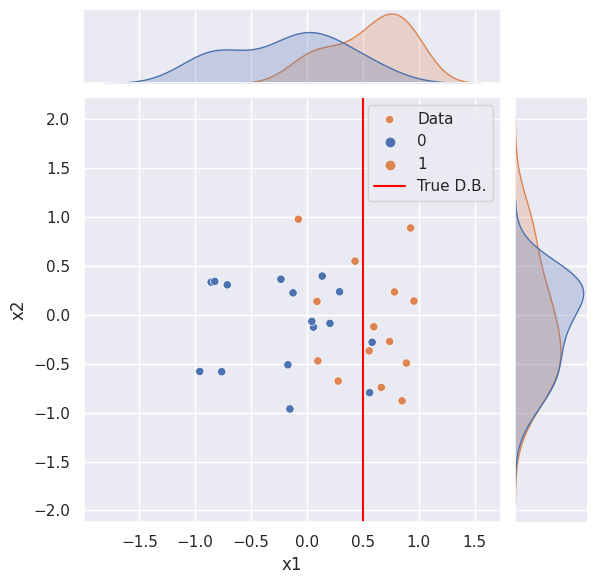

In [ ]:
#データと決定境界
sns.jointplot(data=df,x="x1",y="x2",hue="y",label="Data")
plt.axvline(x=0.5,color="red",label="True D.B.")
plt.legend()
plt.show()

決定境界で$y=1$と$y=0$を予測します。

$\vec{w}=(w_0,w_1,w_2)$を与えたとき、データフレームdataの$\vec{x}$に対して$y=1$の確率を予測する関数predict()を定義します。





In [ ]:
#w0,w1,w2,dfをインプットしてy=1の確率を計算する関数
def predict(w0,w1,w2,data):
  pred=sigmoid(w0+w1*data.x1+w2*data.x2)
  return pred

predict()関数と真の$w_0,w_1,w_2$を使ってデータdfの分類を行ってみます。

確率を計算し，0.5以上で1、0.5未満で0と予測します。

In [ ]:
from sklearn.metrics import accuracy_score
#データを生成した真のモデルでyの値を予測
y_pred_true_model=(predict(w0,w1,w2,df)>=0.5).astype(int)
print('Accuracy: %.3f' % accuracy_score(df.y, y_pred_true_model))

Accuracy: 0.767


データの生成に用いたモデルで予測したとき、$n=30$個中23個を正しく予測しました。

Accuracyは0.767となりました。

では、$Y$を$x_1,x_2$でロジスティック回帰してみます。

In [ ]:
# モデル化
model_12 = smf.glm("y ~ x1+x2", data=df,family=sm.families.Binomial()).fit()
model_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   30
Model:                            GLM   Df Residuals:                       27
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11.762
Date:                Thu, 13 Jul 2023   Deviance:                       23.524
Time:                        04:48:35   Pearson chi2:                     20.3
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4499
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1927      0.696     -1.714      0.087      -2.557       0.171
x1             4.8452      1.825      2.654      0.008       1.267       8.423
x2             1.1591      1.179      0.983      0.326      -1.152       3.470
==============================================================================
"""

モデルの対数尤度を調べてみます。

In [ ]:
#対数尤度の確認
model_12.llf

-11.761942135284265

モデルの逸脱度を調べてみます。

In [ ]:
#逸脱度の確認
model_12.deviance

23.523884270568523

モデルのAICを調べてみます。

In [ ]:
#aicの確認
model_12.aic

29.52388427056853

回帰係数を調べてみます。

In [ ]:
#回帰係数の確認
w0_model_12,w1_model_12,w2_model_12=model_12.params
print(np.round([w0_model_12,w1_model_12,w2_model_12],2))

[-1.19  4.85  1.16]


決定境界は$w_2$がほぼゼロになり、誤差が大きくなることを想定し、

$$
x_1=-\frac{w_0}{w_1}-\frac{w_2}{w_1}x_2
$$

で計算します。

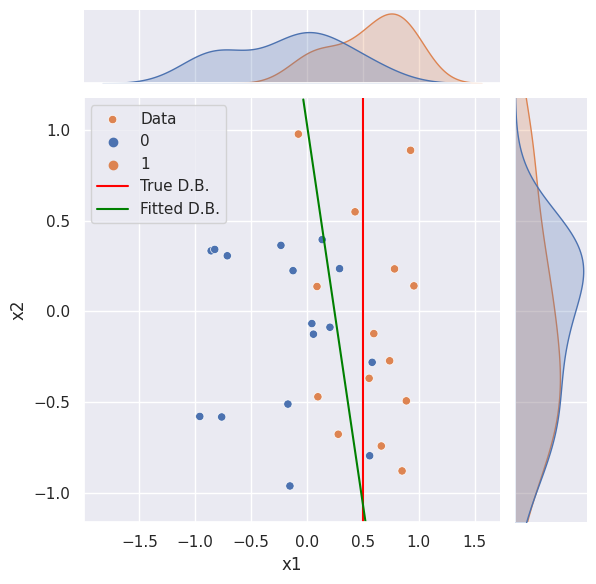

In [ ]:
#データと決定境界
sns.jointplot(data=df,x="x1",y="x2",hue="y",label="Data")
plt.axvline(x=0.5,color="red",label="True D.B.")
x2=np.arange(df.x2.min()-0.2,df.x2.max()+0.2,0.01)
x1=-(w0_model_12/w1_model_12+(w2_model_12/w1_model_12)*x2)
plt.plot(x1,x2,color="green",label="Fitted D.B.")
plt.legend()
plt.ylim(df.x2.min()-0.2,df.x2.max()+0.2)
plt.show()

真の決定境界とデータにフィットしたモデルから求めた決定境界は微妙に異なります。

では、どちらの決定境界が正しくデータを分類$(y=1 or y=0)$出来たのでしょうか？

Accuracyを計算してみます。



In [ ]:
#モデルの適合度を訓練データで確認
y_pred_model_12=(model_12.predict(df)>=0.5).astype(int)
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(df.y, y_pred_model_12))

Accuracy: 0.767


フィットしたモデルと真のモデル、ともに23個を正しく分類し、Accuracyは0.767となりました。

モデルを訓練したデータで再度Accuracyを計算するので、Accuracyが高くなるのは想定内です。

問題は、未知データでどれほどの精度を出せるかです。


汎化能力の測定

未知データでの予測能力を測定します。

サンプルサイズ1000のデータを新たに生成し、データフレームdf_newとします。



In [ ]:
#サンプルサイズ
n=1000
#x1,x2をn個の一様乱数で生成
x1=2*(np.random.rand(n)-0.5)
x2=2*(np.random.rand(n)-0.5)
ps=sigmoid(w0+w1*x1+w2*x2)
#一様乱数が確率以下なら1、そうでないなら0と変換
y=(np.random.rand(n)<=ps).astype(int)
#データフレームにまとめる
df_new=pd.DataFrame({"x1":x1,"x2":x2,"y":y})
df_new.head()

,x1,x2,y
0,-0.362862,-0.291550,0
1,0.334821,-0.759445,1
2,-0.736404,0.509802,0
3,0.432654,0.770044,0
4,-0.421188,-0.799497,0


そして、未知データdf_newの散布図と真の決定境界、推定した決定境界をプロットしてみます。

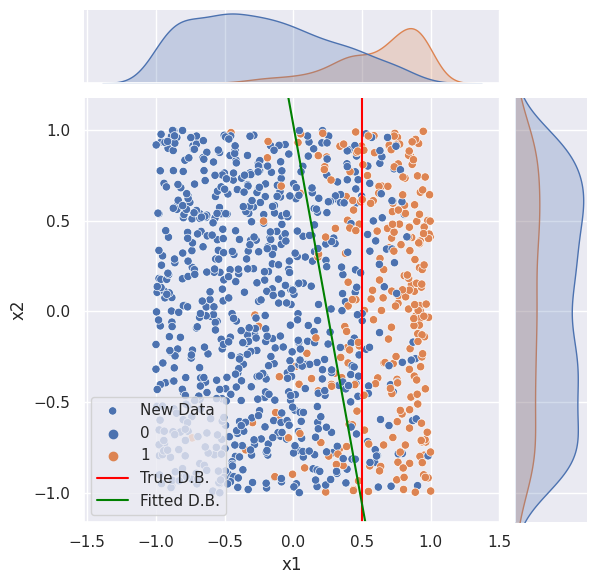

In [ ]:
#データと決定境界
sns.jointplot(data=df_new,x="x1",y="x2",hue="y",label="New Data")
plt.axvline(x=0.5,color="red",label="True D.B.")
x2=np.arange(df_new.x2.min()-0.2,df_new.x2.max()+0.2,0.01)
x1=-(w0_model_12/w1_model_12+(w2_model_12/w1_model_12)*x2)
plt.plot(x1,x2,color="green",label="Fitted D.B.")
plt.legend()
plt.ylim(df.x2.min()-0.2,df.x2.max()+0.2)
plt.show()

Accuracyを計算してみます。

In [ ]:
#未知データdf_newでAccuracyを計算
#データ生成に用いた真のモデルで予測値yを計算
y_pred_true_model=(predict(w0,w1,w2,df_new)>=0.5).astype(int)
#フィットした2変数のロジスティック回帰モデルで予測値yを計算
y_pred_model_12=(model_12.predict(df_new)>=0.5).astype(int)
print('Accuracy: %.3f' % accuracy_score(df_new.y, y_pred_true_model))
print('Accuracy: %.3f' % accuracy_score(df_new.y, y_pred_model_12))

Accuracy: 0.852
Accuracy: 0.819


データの生成に用いた”真の”モデルのほうが予測精度が高いことが分かります。

データの記述に採用したモデルでは、真のモデルには含まれていない$x_2$を
含めてデータにフィットしました。

その結果、フィットに用いたデータとの適合度は真のモデルと同じに
なりました。

一方、未知データでの予測については、$x_2$を含めてデータにフィットした
ことで、$x_2$の係数がゼロにならない限り、ノイズとなり、汎化能力が
低下しています。

モデル選択で不必要な変数$x_2$を取り除くことを考えてみます。


## 2.3. モデル選択

回帰分析のときも解説しましたが、モデル選択、変数選択は汎化能力を基準に行うのでした。

説明変数が$x_1,x_2$の2個あるデータdf,df_newを用いて変数選択を行います。

真のモデルは$w_0=-2,w_1=4,w_2=0$として

$$
f(x_1,x_2)=-2+4\cdot x_1+0\cdot x_2
$$

$$
P(Y=1|\vec{x})=S(f(x_1,x_2))
$$

でした。

以下の4つのモデルの汎化能力を推定・比較してみます。

1. model_0:$y\sim 1$

2. model_1:$y\sim x_1$

3. model_2:$y\sim x_2$

4. model_12:$y\sim x_1+x_2$

それぞれのモデルをdfでフィット（訓練）します。


In [ ]:
#訓練データdfでモデルをフィット
model_0 = smf.glm("y ~ 1", data=df,family=sm.families.Binomial()).fit()
model_1 = smf.glm("y ~ x1", data=df,family=sm.families.Binomial()).fit()
model_2 = smf.glm("y ~ x2", data=df,family=sm.families.Binomial()).fit()
model_12 = smf.glm("y ~ x1+x2", data=df,family=sm.families.Binomial()).fit()

まず、逸脱度を見てみます。

フィットに用いたデータでの逸脱度です。

逸脱度は対数尤度の-2倍です。モデルパラメータの数（モデル自由度）が
増えると、逸脱度は減少します。

Deviance: y~1:41.5 y~x1:24.6 y~x2:41.4 y~x1+x2:23.5


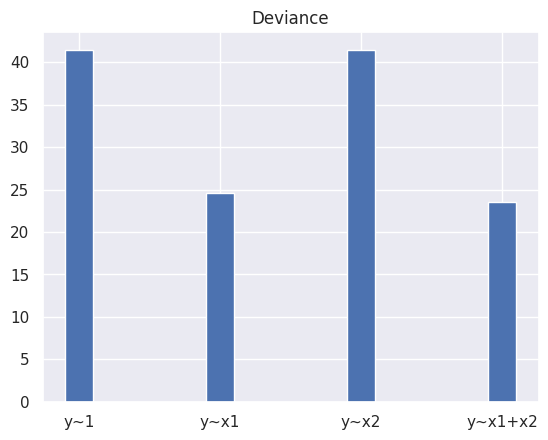

In [ ]:
#訓練データでの逸脱度の比較
xs=["y~1","y~x1","y~x2","y~x1+x2"]
ys=[model_0.deviance,model_1.deviance,model_2.deviance,model_12.deviance]
print('Deviance: y~1:%.1f y~x1:%.1f y~x2:%.1f y~x1+x2:%.1f' % (model_0.deviance,model_1.deviance,model_2.deviance,model_12.deviance))
plt.bar(xs,ys,width=0.2)
plt.title("Deviance")
plt.show()

model_12の逸脱度が最小で、次にmodel_1です。

変数の数が多ければ多いほど、データにモデルはフィットできます。

model_12の逸脱度が最小になることは想定内です。

一方、model_0とmodel_2の逸脱度はほ同じです。




上の結果は変数$x_2$が不要であることを示唆しています。

未知データでの予測能力を推定するために、未知データでの逸脱度の推定量
であるAICを計算して比較します。


AIC: y~1:43.5 y~x1:28.6 y~x2:45.4 y~x1+x2:29.5


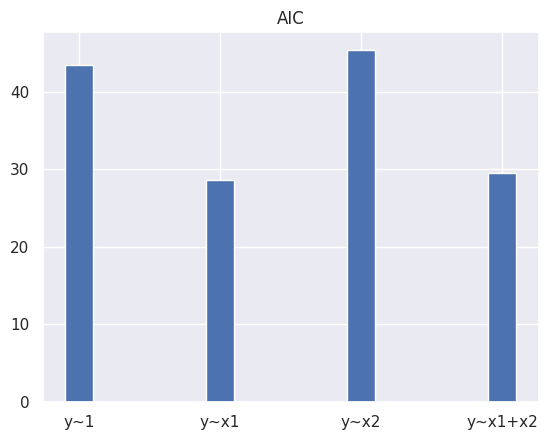

In [ ]:
#訓練データでAICを計算し、未知データでの逸脱度を推定して比較
xs=["y~1","y~x1","y~x2","y~x1+x2"]
ys=[model_0.aic,model_1.aic,model_2.aic,model_12.aic]
print('AIC: y~1:%.1f y~x1:%.1f y~x2:%.1f y~x1+x2:%.1f' % (model_0.aic,model_1.aic,model_2.aic,model_12.aic))
plt.bar(xs,ys,width=0.2)
plt.title("AIC")
plt.show()



model_1：$y\sim x_1$のAICが最小になっています。

AIC最小基準でモデルを選択する場合、モデル1を選択することになります。

では、未知データdf_newでのAccuracyを計算して比較してみます。

Accuracy: y~1:0.73 y~x1:0.83 y~x2:0.72 y~x1+x2:0.82  True Model:0.85


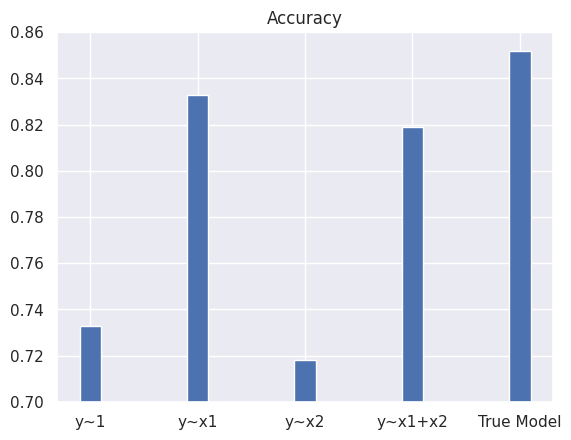

In [ ]:
#未知データでyの値を予測
y_pred_true_model=(predict(w0,w1,w2,df_new)>0.5).astype(int) #データの生成に用いた真のモデル
y_pred_model_0=(model_0.predict(df_new)>=0.5).astype(int)
y_pred_model_1=(model_1.predict(df_new)>=0.5).astype(int)
y_pred_model_2=(model_2.predict(df_new)>=0.5).astype(int)
y_pred_model_12=(model_12.predict(df_new)>=0.5).astype(int)
#Accuracyの計算
acc_true=accuracy_score(df_new.y, y_pred_true_model)
acc_0=accuracy_score(df_new.y, y_pred_model_0)
acc_1=accuracy_score(df_new.y, y_pred_model_1)
acc_2=accuracy_score(df_new.y, y_pred_model_2)
acc_12=accuracy_score(df_new.y, y_pred_model_12)
print('Accuracy: y~1:%.2f y~x1:%.2f y~x2:%.2f y~x1+x2:%.2f  True Model:%.2f' % (acc_0,acc_1,acc_2,acc_12,acc_true))
#Accuracyを棒グラフでプロット
xs=["y~1","y~x1","y~x2","y~x1+x2","True Model"]
ys=[acc_0,acc_1,acc_2,acc_12,acc_true]
plt.bar(xs,ys,width=0.2)
plt.title("Accuracy")
plt.ylim((0.7,0.86))
plt.show()

データの生成に用いたTrue ModelのAccuracyが最高です。

次はmodel_1：$y\sim x_1$のAccuracyが高いです。

AIC,未知データでのAccuracyのどちらでもモデル1を選択できました。

AICは尤度が計算できるパラメトリックなモデルの比較には有効ですが、
機械学習でのざまざまなモデルは尤度が存在せずAICで比較できないことが
多いです。

そのため、モデル選択においては未知データでのAccuracyなどの予測精度の指標
で比較するのが普通です。





#### 注意

AICは未知データでの逸脱度の推定量です。

推定量なのでデータごとに値が異なります。

AICでモデルを選択する場合、AICのゆらぎの大きさも考慮する必要があります。

同様に、Accuracyの評価もサンプルサイズが小さいと誤差が大きくなります。

わずかな差（例えばAICなら0.5程度）なら判断を保留することもあります。



## 2.4 混同行列とその他の予測精度の指標

汎化性能が最大だったmodel_1で混同行列を計算してみます。

In [ ]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=df_new.y, y_pred=y_pred_model_1)
print(confmat)

[[604 129]
 [ 38 229]]


全データ数は1000でした。TP+TN=604+229=833のケースで正確に分類しています。

Accuracyは約0.83です。


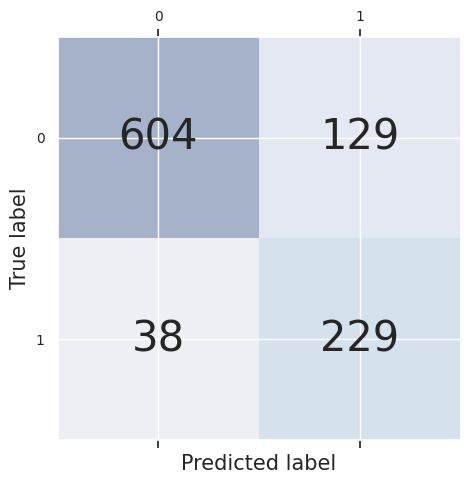

In [ ]:
#@title 混同行列{ vertical-output: true, display-mode: "form" }

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center', fontsize=30)

plt.xlabel('Predicted label', fontsize=15)
plt.ylabel('True label', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

適合率,再現率,F1スコアを計算してみます。

In [ ]:
#適合率,再現率,F1スコアを計算
from sklearn.metrics import precision_score, recall_score, f1_score
print('Precision: %.3f' % precision_score(y_true=df_new.y, y_pred=y_pred_model_1))
print('Recall: %.3f' % recall_score(y_true=df_new.y, y_pred=y_pred_model_1))
print('F1: %.3f' % f1_score(y_true=df_new.y, y_pred=y_pred_model_1))

Precision: 0.640
Recall: 0.858
F1: 0.733


## 2.5. ROC 曲線とAUC

ROC曲線はscikit-learnのroc_curve関数を使えば簡単にプロットできます。

また、AUCもroc_auc_score関数で計算できます。

ロジスティック回帰の4つのモデルの性能をAUCで比較してみます。

In [ ]:
#ROC曲線、AUCの計算
from sklearn.metrics import roc_curve, roc_auc_score
prob_true=predict(w0,w1,w2,df_new)
prob_0 = model_0.predict(df_new)
prob_1 = model_1.predict(df_new)
prob_2 = model_2.predict(df_new)
prob_12 = model_12.predict(df_new)
#AUCの計算
auc_true=roc_auc_score(df_new.y, prob_true)
auc_0=roc_auc_score(df_new.y, prob_0)
auc_1=roc_auc_score(df_new.y, prob_1)
auc_2=roc_auc_score(df_new.y, prob_2)
auc_12=roc_auc_score(df_new.y, prob_12)
#AUCの比較
print('AUC: y~1:%.2f y~x1:%.2f y~x2:%.2f y~x1+x2:%.2f  True Model:%.2f' % (auc_0,auc_1,auc_2,auc_12,auc_true))

AUC: y~1:0.50 y~x1:0.92 y~x2:0.52 y~x1+x2:0.91  True Model:0.92


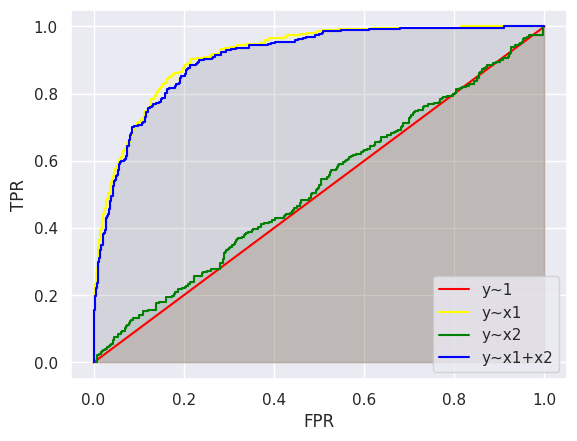

In [ ]:
#ROC曲線の計算
colors = ['red', 'yellow', 'green','blue']
FPR_0, TPR_0, thresholds = roc_curve(df_new.y, prob_0)
FPR_1, TPR_1, thresholds = roc_curve(df_new.y, prob_1)
FPR_2, TPR_2, thresholds = roc_curve(df_new.y, prob_2)
FPR_12, TPR_12, thresholds = roc_curve(df_new.y, prob_12)
#ROC曲線をプロット
plt.plot(FPR_0,TPR_0, color=colors[0], label='y~1')
plt.plot(FPR_1,TPR_1, color=colors[1], label='y~x1')
plt.plot(FPR_2,TPR_2, color=colors[2], label='y~x2')
plt.plot(FPR_12,TPR_12, color=colors[3], label='y~x1+x2')
#ROC曲線の下側エリアのプロット
plt.fill_between(FPR_0,TPR_0,0, color=colors[0], alpha=0.1)
plt.fill_between(FPR_1,TPR_1,0, color=colors[1], alpha=0.1)
plt.fill_between(FPR_2,TPR_2,0, color=colors[2], alpha=0.1)
plt.fill_between(FPR_12,TPR_12,0, color=colors[3], alpha=0.1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

## 2.6. 練習

次のセルを実行してdf,df_newを生成する。

df,df_newを用いて目的変数$y$をロジスティック回帰モデルでフィットし、
モデル選択と汎化性能の評価を行います。

In [ ]:
#乱数のシードを設定
np.random.seed(0)
#回帰係数を設定
w0,w1,w2,w3=0.5,0.0,-2.0,3.0
#訓練データ
#サンプルサイズ
n=100
#x1,x2をn個の正規乱数で生成
x1=np.round(np.random.normal(size=n,loc=0,scale=1),1)
x2=np.round(np.random.normal(size=n,loc=0,scale=1),1)
x3=np.round(np.random.normal(size=n,loc=0,scale=1),1)
#シグモイド関数で確率を計算
ps=sigmoid(w0+w1*x1+w2*x2+w3*x3)
#一様乱数が確率以下なら1、そうでないなら0と変換
y=(np.random.rand(n)<=ps).astype(int)
#データフレームにまとめる
df=pd.DataFrame({"x1":x1,"x2":x2,"x3":x3,"y":y})
#テストデータ
#サンプルサイズ
n=100
#x1,x2をn個の正規乱数で生成
x1=np.round(np.random.normal(size=n,loc=0,scale=1),1)
x2=np.round(np.random.normal(size=n,loc=0,scale=1),1)
x3=np.round(np.random.normal(size=n,loc=0,scale=1),1)
#シグモイド関数で確率を計算
ps=sigmoid(w0+w1*x1+w2*x2+w3*x3)
#一様乱数が確率以下なら1、そうでないなら0と変換
y=(np.random.rand(n)<=ps).astype(int)
#データフレームにまとめる
df_new=pd.DataFrame({"x1":x1,"x2":x2,"x3":x3,"y":y})

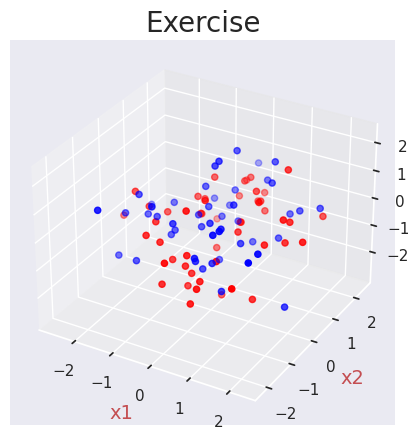

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# Figureを追加
fig = plt.figure(figsize = (5, 5))
# 3DAxesを追加
ax = fig.add_subplot(111, projection='3d')
# Axesのタイトルを設定
ax.set_title("Exercise", size = 20)
# 軸ラベルを設定
ax.set_xlabel("x1", size = 14, color = "r")
ax.set_ylabel("x2", size = 14, color = "r")
ax.set_zlabel("x3", size = 14, color = "r")
# 軸目盛を設定
ax.set_xticks([-2.0, -1, 0.0, 1, 2.0])
ax.set_yticks([-2.0, -1, 0.0, 1, 2.0])
ax.set_zticks([-2.0, -1, 0.0, 1, 2.0])
# 曲線を描画
ax.scatter(df[df.y==1].x1, df[df.y==1].x2, df[df.y==1].x3, s = 20, color="blue")
ax.scatter(df[df.y==0].x1, df[df.y==0].x2, df[df.y==0].x3, s = 20, color="red")
plt.show()

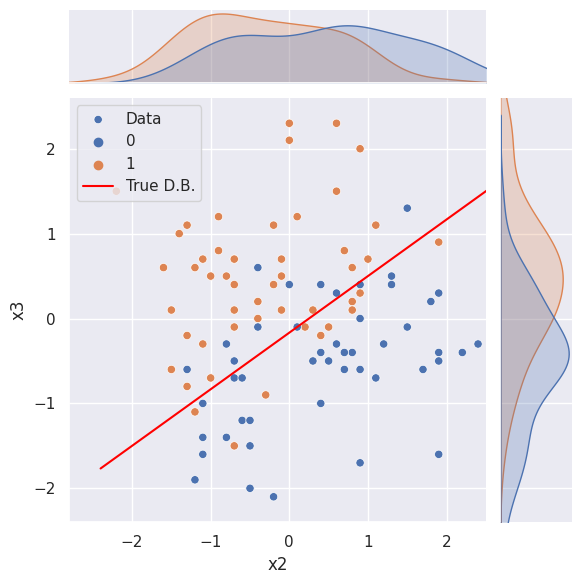

In [ ]:
#(x2,x3)面でのデータの分布と決定境界
sns.jointplot(data=df,x="x2",y="x3",hue="y",label="Data")
x2=np.arange(df.x2.min()-0.2,df.x2.max()+0.2,0.01)
x3=-(0.5/3+(-2/3)*x2)
plt.plot(x2,x3,color="red",label="True D.B.")
plt.legend()
plt.xlim(df.x1.min()-0.2,df.x1.max()+0.2)
plt.ylim(df.x2.min()-0.2,df.x2.max()+0.2)
plt.show()

### 問題1

AIC最小基準でモデル選択を行う。AIC最小モデルのAICを表示せよ。

In [ ]:
#問題1
#モデルをフィット
model_0 = smf.glm("y ~1", data=df,family=sm.families.Binomial()).fit()
model_1 = smf.glm("y ~x1", data=df,family=sm.families.Binomial()).fit()
model_2 = smf.glm("y ~x2", data=df,family=sm.families.Binomial()).fit()
model_3 = smf.glm("y ~x3", data=df,family=sm.families.Binomial()).fit()
model_12 = smf.glm("y ~x1+x2", data=df,family=sm.families.Binomial()).fit()
model_13 = smf.glm("y ~x1+x3", data=df,family=sm.families.Binomial()).fit()
model_23 = smf.glm("y ~x2+x3", data=df,family=sm.families.Binomial()).fit()
model_123 = smf.glm("y ~x1+x2+x3", data=df,family=sm.families.Binomial()).fit()
#AICを計算
aic_0,aic_1,aic_2,aic_3,aic_12,aic_13,aic_23,aic_123=model_0.aic,model_1.aic,model_2.aic,model_3.aic,model_12.aic,model_13.aic,model_23.aic,model_123.aic
print('AIC: model_0:%.2f model_1:%.2f model_2:%.2f model_3:%.2f model_12:%.2f model_13:%.2f model_23:%.2f model_123:%.2f  ' % (aic_0,aic_1,aic_2,aic_3,aic_12,aic_13,aic_23,aic_123))
#最小AICの表示
print(np.round(aic_123,2))

AIC: model_0:140.63 model_1:140.68 model_2:127.69 model_3:108.53 model_12:125.78 model_13:109.31 model_23:83.59 model_123:80.24  
80.24


### 問題2

未知データdf_newでAccuacyを計算しモデル選択を行う。Accuracyが最大のモデルのAccuracyを表示せよ。

In [ ]:
#問題2
#de_newでｙの予測値を計算
y_pred_model_0=(model_0.predict(df_new)>=0.5).astype(int)
y_pred_model_1=(model_1.predict(df_new)>=0.5).astype(int)
y_pred_model_2=(model_2.predict(df_new)>=0.5).astype(int)
y_pred_model_3=(model_3.predict(df_new)>=0.5).astype(int)
y_pred_model_12=(model_12.predict(df_new)>=0.5).astype(int)
y_pred_model_13=(model_13.predict(df_new)>=0.5).astype(int)
y_pred_model_23=(model_23.predict(df_new)>=0.5).astype(int)
y_pred_model_123=(model_123.predict(df_new)>=0.5).astype(int)
#Accuracyを計算
acc_0=accuracy_score(df_new.y, y_pred_model_0)
acc_1=accuracy_score(df_new.y, y_pred_model_1)
acc_2=accuracy_score(df_new.y, y_pred_model_2)
acc_3=accuracy_score(df_new.y, y_pred_model_3)
acc_12=accuracy_score(df_new.y, y_pred_model_12)
acc_13=accuracy_score(df_new.y, y_pred_model_13)
acc_23=accuracy_score(df_new.y, y_pred_model_23)
acc_123=accuracy_score(df_new.y, y_pred_model_123)
print('ACC: model_0:%.2f model_1:%.2f model_2:%.2f model_3:%.2f model_12:%.2f model_13:%.2f model_23:%.2f model_123:%.2f  ' % (acc_0,acc_1,acc_2,acc_3,acc_12,acc_13,acc_23,acc_123))
#Accuracyの表示
print(np.round(acc_23,2))

ACC: model_0:0.50 model_1:0.57 model_2:0.69 model_3:0.70 model_12:0.75 model_13:0.74 model_23:0.86 model_123:0.85  
0.86


### 問題3

未知データdf_newでAUCを計算し、AUC最大のモデルを選択する。

AUC最大のモデルのAUCを表示せよ。

In [ ]:
#問題3
# df_newでy=1の確率の計算
prob_0 = model_0.predict(df_new)
prob_1 = model_1.predict(df_new)
prob_2 = model_2.predict(df_new)
prob_3 = model_3.predict(df_new)
prob_12 = model_12.predict(df_new)
prob_13 = model_13.predict(df_new)
prob_23 = model_23.predict(df_new)
prob_123 = model_123.predict(df_new)
# AUCの計算
auc_0=roc_auc_score(df_new.y, prob_0)
auc_1=roc_auc_score(df_new.y, prob_1)
auc_2=roc_auc_score(df_new.y, prob_2)
auc_3=roc_auc_score(df_new.y, prob_3)
auc_12=roc_auc_score(df_new.y, prob_12)
auc_13=roc_auc_score(df_new.y, prob_13)
auc_23=roc_auc_score(df_new.y, prob_23)
auc_123=roc_auc_score(df_new.y, prob_123)
print('AUC: model_0:%.4f model_1:%.4f model_2:%.4f model_3:%.4f model_12:%.4f model_13:%.4f model_23:%.4f model_123:%.4f  ' % (auc_0,auc_1,auc_2,auc_3,auc_12,auc_13,auc_23,auc_123))
#AUCの表示
print(np.round(auc_23,4))

AUC: model_0:0.5000 model_1:0.5636 model_2:0.7736 model_3:0.8296 model_12:0.7898 model_13:0.8208 model_23:0.9432 model_123:0.9400  
0.9432


### 問題4

AUCが最大のモデルの混同行列を表示せよ。

In [ ]:
#問題4 混同行列の計算
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=df_new.y, y_pred=y_pred_model_23)
#混同行列の表示
print(confmat)

[[44  6]
 [ 8 42]]


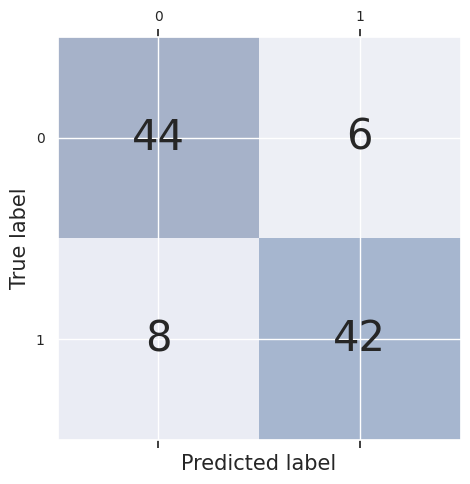

In [ ]:
#@title 混同行列{ vertical-output: true, display-mode: "form" }

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center', fontsize=30)

plt.xlabel('Predicted label', fontsize=15)
plt.ylabel('True label', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

## 3. Pythonでロジスティック回帰分析:scikit-learn利用

次に、scikit-learnを用いた分析方法を紹介します。

実データを用いた分析事例を紹介します。

分析の手順は、1.データの前処理　2.探索的データ分析　3.モデル化とモデル選択、の順番でやっていくものですが、ここでは3のモデル化とモデル選択、正則化を主に扱います。

重回帰モデルと同じく、コスト関数にL1正則化項(Lasso回帰)、L2正則化項(Ridge回帰)を追加することで、モデルの過学習を抑えて汎化能力の高いモデルを構築することができます。

[Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)



ロジスティック回帰では、シグモイド関数$S(f(\vec{x}))$で予測される確率の精度を上げたい

そのために各訓練データの$S(f(\vec{x}))$の値を最大化または最小化し、尤度・対数尤度を最大化する。


対数尤度:
$$
l(\vec{w})=\sum_{i=1}^{n}\biggl[y^{(i)}\log\Bigl(S\bigl(f(\vec{x}_i)\bigr)\Bigl)+\Bigl(1-y^{(i)}\Bigr)\log\Bigl(1-S\bigl(f(\vec{x}_i)\bigr)\Bigr)\biggr]\qquad\qquad\qquad
$$

この対数尤度を「最大化」すれば「重みが正しく学習された」ことになる。

勾配降下法では「最小化」するため対数尤度の符号を反転させたコスト関数を定義する

$$
J(\vec{w})=-l(\vec{w})
$$

## 3.1 データセット

[乳がん患者のデータセットの紹介](https://3pysci.com/python-sklearn-51/)


[Pythonを用いた乳がんデータセットの分析と予測](https://qiita.com/mahomaho/items/5e0e3fcf7d4dc881d9cd)

[PythonでAI開発](https://xtech.nikkei.com/atcl/nxt/column/18/01408/082600002/)

今回使用する乳がんのデータセットは、ウィスコンシン大学の乳がん診断データセット(Wisconsin Diagnostic Breast Cancer, WDBC)と呼ばれています。

乳がんの検診で腫瘍が見つかった患者に対して腫瘍細胞を採取し、顕微鏡で分析した結果を数値化した情報となっています。


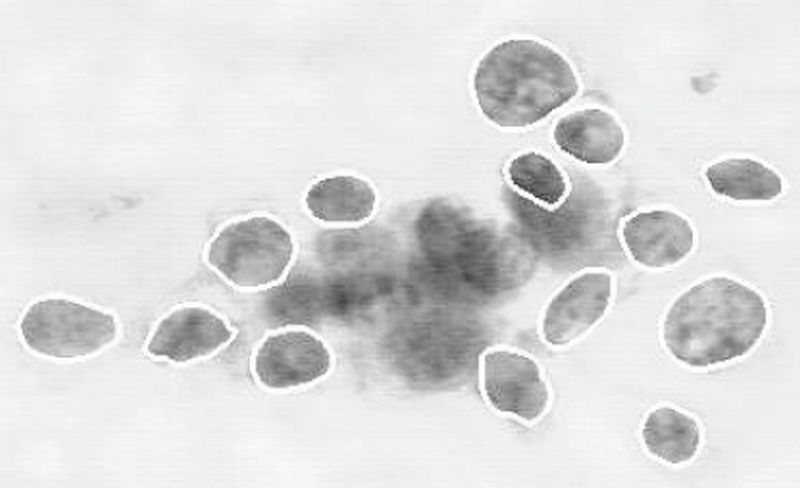

データ数は569、特徴量の数は30です。

特徴量リスト：10種ぞれぞれの平均値,標準偏差,worst or largestの3つの数値

1. radius：半径

2. texture：見た目（形状）

3. perimeter：境界線の状態

4. area：面積

5. smoothness：滑らかさ

6. compactness：コンパクト度(perimeter^2 / area – 1.0)

7. concavity：輪郭の凹部の重要度（凹部の強さ？）

8. concave points：凹部の数

9. symmetry：対称性

10. fractal dimension：フラクタル次元の数値


### モデルの目的

モデルの目的は、精密検査データを入力とし、診断結果を予測するモデルを作ることです。対象業務が医療であるため、モデルが医者の代わりをすることは現実には難しいですが、医者の診断の補助はできるでしょう。

モデルの予測結果は「悪性（malignant）」「良性（benign）」の2種類で、学習データには、医者が診断した正解データも含んでいるので、「教師あり学習」の学習方式のうち、「分類」に該当します。下にモデルの概念図を示しました。


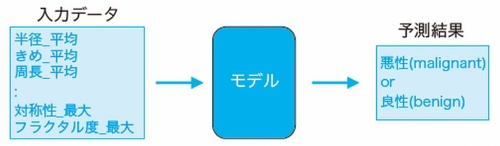

In [ ]:
#sklearn.datasetsのメソッドを使って読み込み
from sklearn.datasets import load_breast_cancer
data_breast_cancer = load_breast_cancer()
#print(dir(data_breast_cancer))
print(data_breast_cancer.DESCR) #データセットの詳細な説明の表示

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
#データフレーム、特徴量行列、目的変数列の作成
feature_names = data_breast_cancer.feature_names # 特徴量の名前の取得
y = pd.DataFrame(data_breast_cancer["target"], columns=["y"]) # 目的変数
X = pd.DataFrame(data_breast_cancer["data"], columns=feature_names) # 特徴量行列
df = pd.concat([X,y], axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
#データの行数・列数の確認
df.shape,y.shape,X.shape

((569, 31), (569, 1), (569, 30))

In [ ]:
#欠損値の確認
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
y                          0
dtype: int64

In [ ]:
#データの変数の型の確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
#各変数の基本統計量の確認
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


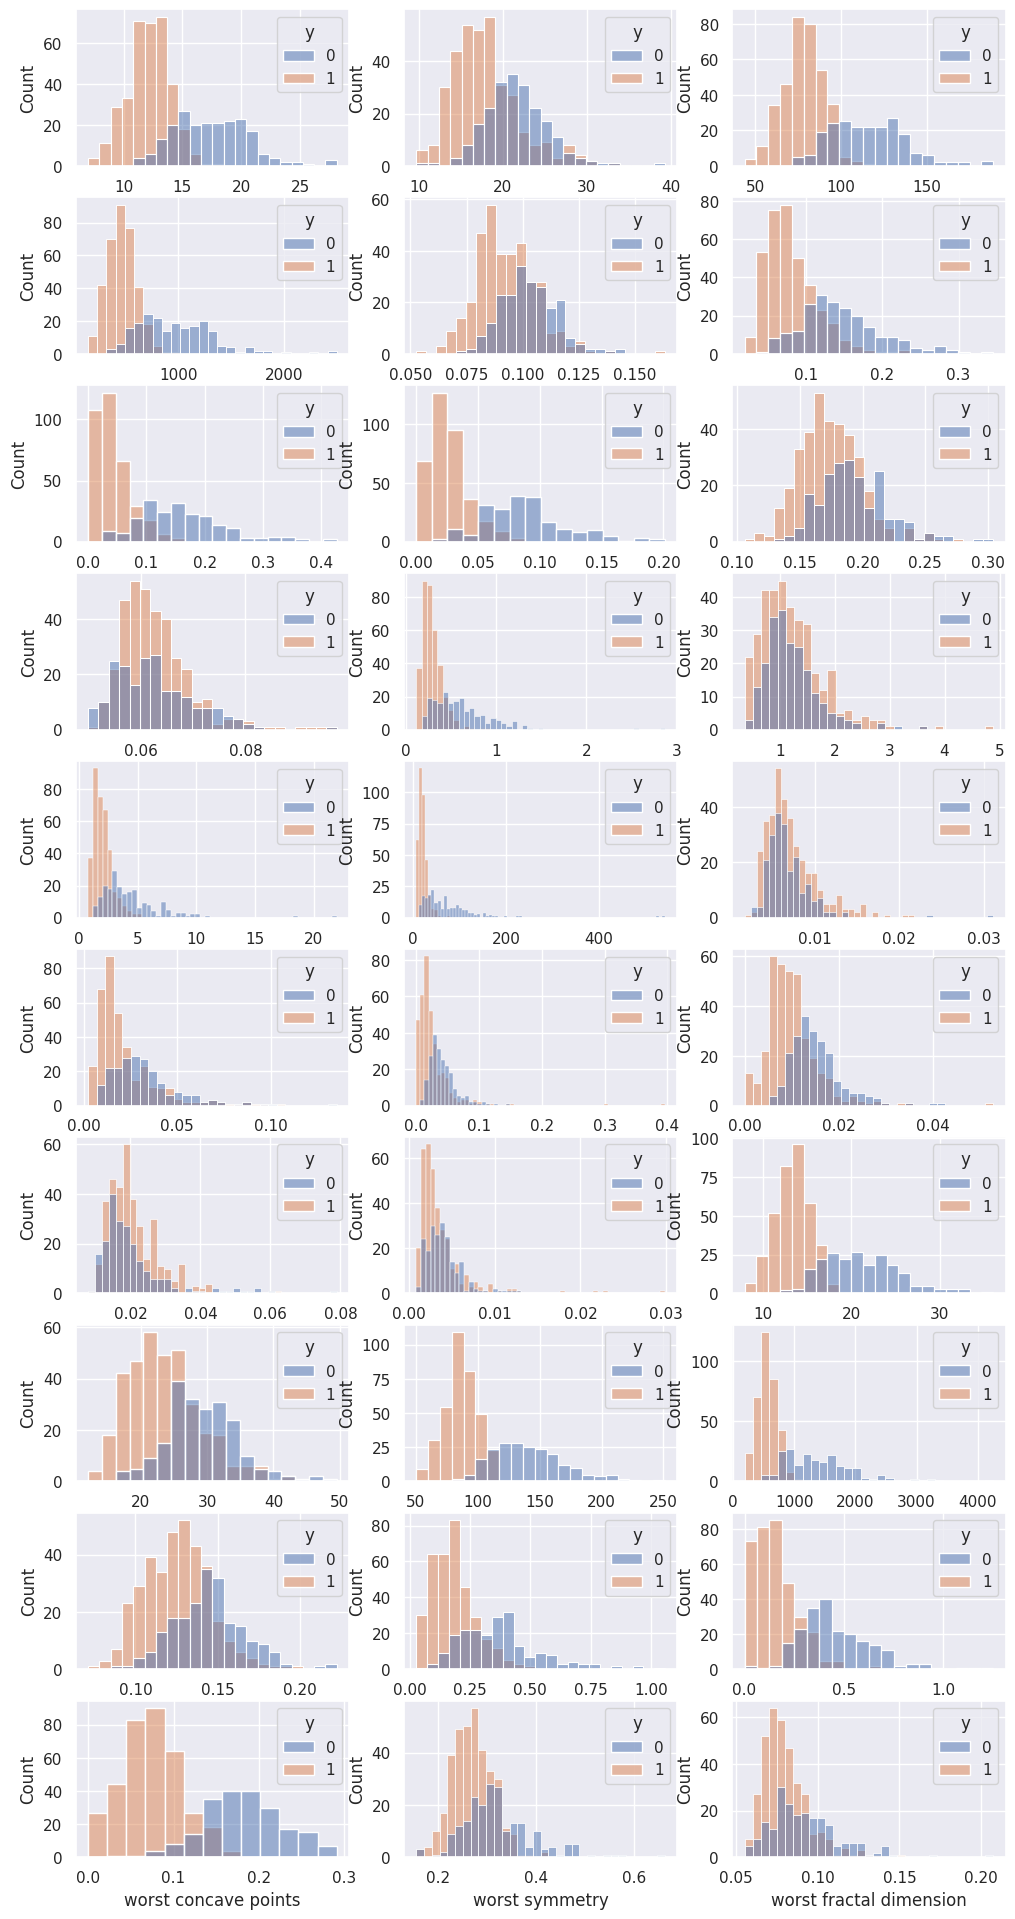

In [ ]:
# 特徴量の分布を可視化
fig, ax = plt.subplots(10, 3, figsize=(12,24),dpi=100)
for i, feature in enumerate(feature_names):
  sns.histplot(df,x=feature,hue="y",ax=ax[i//3,i%3])
#グラフの表示
plt.show()

In [ ]:
#データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7,stratify=y, random_state=1)
#ｙを2次元配列から1次元配列に変換
y_train = y_train.values.ravel()   # 1    2d array -> 1d array
y_test  = y_test.values.ravel()    # 2    2d array -> 1d array
# 特徴量の正規化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

特徴量の正規化も終わったのでモデル化を始めます。

重回帰のときと同じく、分類器クラスLogisticRegressionのオブジェクトを
生成し、fitメソッドでデータとフィットします。

- penaltyで正則化を指定します。まず、素のロジスティック回帰で分析します。

In [ ]:
#ロジスティック回帰モデルのインスタンスの生成
lr = LogisticRegression(penalty=None,random_state=1, multi_class='auto')   # solver：最適化アルゴリズムの種類
#モデルのフィット
lr.fit(X_train, y_train)

LogisticRegression(penalty=None, random_state=1)

次に訓練データ、未知データとの適合度をAccuracyで計測します。

そのために、それぞれの特徴量行列でyの値を予測します。

In [ ]:
#当てはめ値の計算
y_train_pred = lr.predict(X_train)
#予測値の計算
y_test_pred = lr.predict(X_test)

Accuracyを計算します。

In [ ]:
# Accuracyの計算
acc_train=accuracy_score(y_train, y_train_pred)
acc_test=accuracy_score(y_test, y_test_pred)
#結果の表示
print('ACC: Logostic Regression model Train:%.4f Test :%.4f' % (acc_train,acc_test))

ACC: Logostic Regression model Train:1.0000 Test :0.9532


訓練データでは100％分類できていますが、テストデータでは95\%です。

若干過学習かもしれません。

AUCも調べてみます。まず、分類に用いる確率を計算します。

そして、AUCを計算します。

In [ ]:
#AUCの計算(ROC解析)
#分類に用いる確率を計算。
prob_train=lr.predict_proba(X_train)[:,1]
prob_test=lr.predict_proba(X_test)[:,1]
# AUCの計算
auc_train=roc_auc_score(y_train,prob_train)
auc_test=roc_auc_score(y_test, prob_test)
#結果の表示
print('AUC: Logostic Regression model Train:%.4f Test :%.4f' % (auc_train,auc_test))

AUC: Logostic Regression model Train:1.0000 Test :0.9582


### 正則化

過学習を防ぐ方法としてコスト関数に以下の正則化項を追加します。

- L1 正則化項：

$$
\frac{\lambda}{2}||\boldsymbol{w}||=\frac{\lambda}{2}\sum_{j=1}^{p}|w_{j}|\\
$$

- L2 正則化項：

$$
\frac{\lambda}{2}‖\boldsymbol{w}‖^2=\frac{\lambda}{2}\sum_{j=1}^{p}w_{j}^2\\
$$



<strong>正則化パラメータ</strong>$\lambda$によって正則化の強さを調節します。

scikit-learn のロジスティック回帰クラスで定義されていた $C$ は
$$
C=\frac{1}{\lambda}\\
$$
です。

以下、Holdout法により、
テストデータでのAccuracyが最大になる$C$の値を求めてみます。


LogisticRegressionクラスのオブジェクトはインスタンス変数penaltyで正則化方法を指定します。

- penalty="l1"でL1正則化、"l2"でL2正則化です。

- 正則化項の係数$\lambda$の逆数を$C$で指定します。

    LogisticRegression(penalty='l2',C=1.0)




### 問題5

ロジスティック回帰にL2正則化項を追加したモデルで分析を行う。

テストデータでのAccuracyが最大となる$C$の値を求めよ。

In [ ]:
acc_train = []
acc_test=[]
params=[]
for c in np.arange(-5, 5):
  lr = LogisticRegression(penalty="l2",C=10.**c, random_state=1, max_iter=1000,solver='lbfgs', multi_class='auto')   # C=10^-5 から C=10^4 までの10個
  params.append(10.**c)
  lr.fit(X_train, y_train)
  #当てはめ値の計算
  y_train_pred = lr.predict(X_train)
  #予測値の計算
  y_test_pred = lr.predict(X_test)
  # Accuracyの計算
  acc1=accuracy_score(y_train, y_train_pred)
  acc2=accuracy_score(y_test, y_test_pred)
  acc_train.append(acc1)
  acc_test.append(acc2)

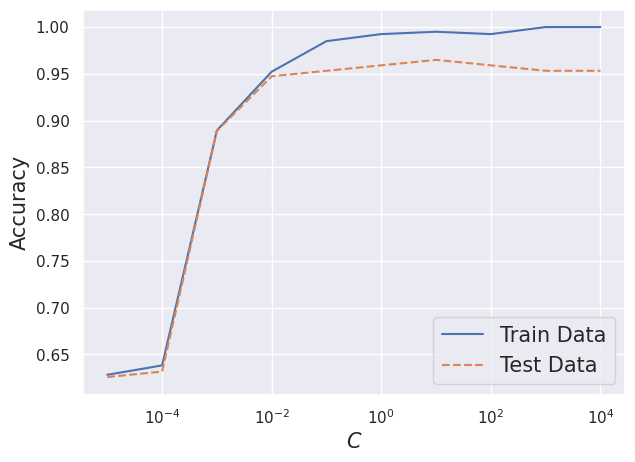

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(params, acc_train, label='Train Data')
plt.plot(params, acc_test, linestyle='--', label='Test Data')
plt.ylabel('Accuracy', fontsize=15)
plt.xlabel('$C$', fontsize=15)
plt.legend(loc='lower right', fontsize=15)
plt.xscale('log')   # 横軸を対数スケールにする
plt.show()

In [ ]:
#問題5
#テストデータでのAccuracyが最大となる正則化パラメータCを求め、表示
i=acc_test.index(max(acc_test))
C_max=params[i]
#結果を表示
print(C_max)

10.0


### 問題6

問題5で求めた$C$の値でL2正則化したモデルで回帰を行う。

AUCの値を報告せよ。

In [ ]:
lr = LogisticRegression(penalty="l2",C=0.1, solver='liblinear',random_state=1, max_iter=1000, multi_class='auto')   # C=10^-5 から C=10^4 までの10個
lr.fit(X_train, y_train)
#当てはめ値の計算
y_train_pred = lr.predict(X_train)
#予測値の計算
y_test_pred = lr.predict(X_test)
# Accuracyの計算
acc_train=accuracy_score(y_train, y_train_pred)
acc_test=accuracy_score(y_test, y_test_pred)
#結果の表示
print('ACC: Logistic Regression model(Ridge,C=10) Train:%.4f Test :%.4f' % (acc_train,acc_test))
#分類に用いる確率を計算。
prob_train=lr.predict_proba(X_train)[:,1]
prob_test=lr.predict_proba(X_test)[:,1]
# AUCの計算
auc_train=roc_auc_score(y_train,prob_train)
auc_test=roc_auc_score(y_test, prob_test)
#結果の表示
print('AUC: Logostic Regression model Train:%.4f Test :%.4f' % (auc_train,auc_test))

ACC: Logistic Regression model(Ridge,C=10) Train:0.9874 Test :0.9532
AUC: Logostic Regression model Train:0.9959 Test :0.9958


In [ ]:
#問題6
#回答
print(np.round(auc_test,4))

0.9958


### 問題7

ロジスティック回帰にL1正則化項を追加したモデルで分析を行う。

テストデータでのAccuracyが最大となる$C$の値を求めよ。

In [ ]:
acc_train = []
acc_test=[]
params=[]
for c in np.arange(-5, 5):
  lr = LogisticRegression(penalty="l1",C=10.**c, solver='liblinear',random_state=1, max_iter=1000, multi_class='auto')   # C=10^-5 から C=10^4 までの10個
  params.append(10.**c)
  lr.fit(X_train, y_train)
  #当てはめ値の計算
  y_train_pred = lr.predict(X_train)
  #予測値の計算
  y_test_pred = lr.predict(X_test)
  # Accuracyの計算
  acc1=accuracy_score(y_train, y_train_pred)
  acc2=accuracy_score(y_test, y_test_pred)
  acc_train.append(acc1)
  acc_test.append(acc2)

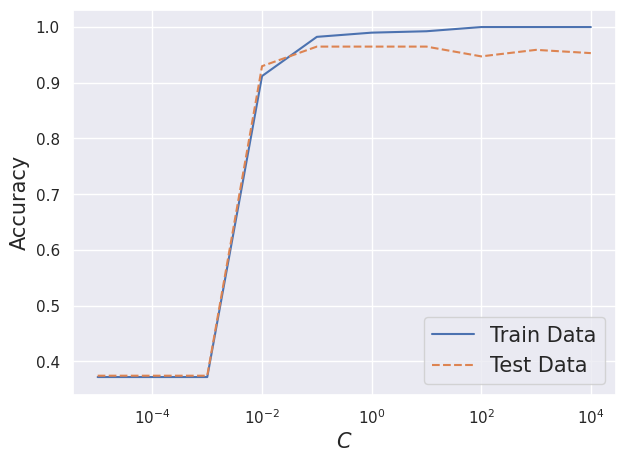

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(params, acc_train, label='Train Data')
plt.plot(params, acc_test, linestyle='--', label='Test Data')
plt.ylabel('Accuracy', fontsize=15)
plt.xlabel('$C$', fontsize=15)
plt.legend(loc='lower right', fontsize=15)
plt.xscale('log')   # 横軸を対数スケールにする
plt.show()

In [ ]:
#問題7
#テストデータでのAccuracyが最大となる正則化パラメータCを求め、表示
i=acc_test.index(max(acc_test))
acc_test_max=acc_test[i]
C_max=params[i]
#結果を表示
print(C_max)

0.1


### 問題8

問題7で求めた$C$の値でL1正則化したモデルで回帰を行う。

AUCの値を報告せよ。

In [ ]:
lr = LogisticRegression(penalty="l1",C=0.1, solver='liblinear',random_state=1, max_iter=1000, multi_class='auto')   # C=10^-5 から C=10^4 までの10個
lr.fit(X_train, y_train)
#当てはめ値の計算
y_train_pred = lr.predict(X_train)
#予測値の計算
y_test_pred = lr.predict(X_test)
# Accuracyの計算
acc_train=accuracy_score(y_train, y_train_pred)
acc_test=accuracy_score(y_test, y_test_pred)
#結果の表示
print('ACC: Logostic Regression model(Lasso,C=0.1) Train:%.4f Test :%.4f' % (acc_train,acc_test))
#分類に用いる確率を計算。
prob_train=lr.predict_proba(X_train)[:,1]
prob_test=lr.predict_proba(X_test)[:,1]
# AUCの計算
auc_train=roc_auc_score(y_train,prob_train)
auc_test=roc_auc_score(y_test, prob_test)
#結果の表示
print('AUC: Logostic Regression model Train:%.4f Test :%.4f' % (auc_train,auc_test))

ACC: Logostic Regression model(Lasso,C=0.1) Train:0.9824 Test :0.9649
AUC: Logostic Regression model Train:0.9949 Test :0.9959


In [ ]:
#問題8
#回答
print(np.round(auc_test,4))

0.9959


# AutoMLを用いたモデル化


In [ ]:
!pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=ce91c361cc9f85ce0f497654839e7701cccf5421491009554c13ac604b0db239
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
from tpot import TPOTClassifier

In [ ]:
tpot = TPOTClassifier(scoring='accuracy',random_state=1,generations=25,population_size=100,verbosity=2,n_jobs=-1)

In [ ]:
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/2600 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9824367088607595

Generation 2 - Current best internal CV score: 0.9824367088607595

Generation 3 - Current best internal CV score: 0.9824367088607595

Generation 4 - Current best internal CV score: 0.9874367088607595

Generation 5 - Current best internal CV score: 0.9874367088607595

Generation 6 - Current best internal CV score: 0.9874367088607595

Generation 7 - Current best internal CV score: 0.9874367088607595

Generation 8 - Current best internal CV score: 0.9874367088607595

Generation 9 - Current best internal CV score: 0.9874367088607595

Generation 10 - Current best internal CV score: 0.9874367088607595

Generation 11 - Current best internal CV score: 0.9874367088607595

Generation 12 - Current best internal CV score: 0.9874367088607595

Generation 13 - Current best internal CV score: 0.9874367088607595

Generation 14 - Current best internal CV score: 0.9874367088607595

Generation 15 - Current best internal CV score: 0.987436

TPOTClassifier(generations=25, n_jobs=-1, random_state=1, scoring='accuracy',
               verbosity=2)

最終的な検討結果（数理モデル）を知りたい場合には、次のコードを入力し実行します。

In [ ]:
tpot.fitted_pipeline_

Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=SGDClassifier(alpha=0.0, eta0=0.01,
                                                           fit_intercept=False,
                                                           l1_ratio=0.0,
                                                           learning_rate='constant',
                                                           loss='log',
                                                           penalty='elasticnet',
                                                           power_t=0.1,
                                                           random_state=1))),
                ('standardscaler', StandardScaler()),
                ('extratreesclassifier',
                 ExtraTreesClassifier(max_features=0.1, min_samples_leaf=5,
                                      min_samples_split=15, random_state=1))])

In [ ]:
y_train_pred = tpot.predict(X_train).astype(int)
y_test_pred = tpot.predict(X_test).astype(int)
# Accuracyの計算
acc_train=accuracy_score(y_train, y_train_pred)
acc_test=accuracy_score(y_test, y_test_pred)
#結果の表示
print('ACC: Logostic Regression model(Lasso,C=0.1) Train:%.4f Test :%.4f' % (acc_train,acc_test))

ACC: Logostic Regression model(Lasso,C=0.1) Train:0.9899 Test :0.9649


を計算してみると、0.81
以上となり、良い結果が得られていることがわかります。
